# P04_01_tf




tensorflow approach for ts is applied.
https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en

In [1]:
section_fig_main_title = 'P04_01_tf_'




In [2]:
# import os
# print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
# print("PATH:", os.environ.get('PATH'))

In [3]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
# from bs4 import BeautifulSoup as bs
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

from tensorflow import keras
from tensorflow.keras import layers


In [4]:
!which python

/Users/amin/miniconda3/bin/python


In [5]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_error
# from xgboost import XGBRegressor
# !/Users/amin/Desktop/proj/env/bin/python -m pip install numpy

In [6]:
from sklearn.metrics import r2_score,mean_absolute_error

In [7]:
# !/Users/amin/anaconda3/bin/python -m pip install --upgrade tensorflow 
# pip install --upgrade tensorflow 

In [8]:

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [11]:
from pandas.plotting import autocorrelation_plot
import gif

In [12]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [13]:
import tensorflow as tf
tf.__version__


'2.6.0'

In [14]:
import gif
from tqdm import tqdm

In [15]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data 

Using the univariate evenly spaced time series data from P03_01.

In [16]:
csv_path = "../Data/Data_ICME_Edited_Decoded_out_P02_03.csv"
dataset = pd.read_csv(csv_path, infer_datetime_format=True)

In [17]:
dataset.index = dataset['ICME Plasma/Field Start Y/M/D (UT) (b)']

In [18]:
dataset.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,
1996-05-27 15:00:00,1996-05-27 15:00:00,1996-05-29 03:00:00,1,2,1,370,400,9,3,117,1.375000
1996-07-01 18:00:00,1996-07-01 18:00:00,1996-07-02 11:00:00,1,4,44,360,370,11,3,78,0.583333
1996-08-07 12:00:00,1996-08-07 12:00:00,1996-08-08 10:00:00,1,2,2,350,380,7,3,88,0.791667
1996-12-23 17:00:00,1996-12-23 17:00:00,1996-12-25 11:00:00,1,2,22,360,420,10,3,69,1.625000
1997-01-10 04:00:00,1997-01-10 04:00:00,1997-01-11 02:00:00,3,1,4,450,460,14,3,191,0.791667


In [19]:
dataset.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)', 'BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval'],
      dtype='object')

Following columns are used for multi-var time series modeling.

```BDE? (e)``` : Evidence of BiDirectional suprathermal Electron strahls (BDE) in ACE/SWEPAM Observations

```MC? (l)``` :  magnetic cloud has been reported in association with the ICME 

```V_ICME (km/s) (i)``` : ICME speed



In [20]:
keep_cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)',
             'BDE? (e)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'Normalized_time_interval']

# keep_cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)' ,'BDE? (e)', 'V_ICME (km/s) (i)','MC? (l)']
df = dataset[keep_cols]
df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,
1996-05-27 15:00:00,1996-05-27 15:00:00,1,2,1,370,9,3,117,1.375000
1996-07-01 18:00:00,1996-07-01 18:00:00,1,4,44,360,11,3,78,0.583333
1996-08-07 12:00:00,1996-08-07 12:00:00,1,2,2,350,7,3,88,0.791667
1996-12-23 17:00:00,1996-12-23 17:00:00,1,2,22,360,10,3,69,1.625000
1997-01-10 04:00:00,1997-01-10 04:00:00,3,1,4,450,14,3,191,0.791667


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 1996-05-27 15:00:00 to 2021-05-12 15:00:00
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ICME Plasma/Field Start Y/M/D (UT) (b)  493 non-null    object 
 1   BDE? (e)                                493 non-null    int64  
 2   Qual. (g)                               493 non-null    int64  
 3   dV (km/s) (h)                           493 non-null    int64  
 4   V_ICME (km/s) (i)                       493 non-null    int64  
 5   B (nT) (k)                              493 non-null    int64  
 6   MC? (l)                                 493 non-null    int64  
 7   Dst (nT) (m)                            493 non-null    int64  
 8   Normalized_time_interval                493 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 38.5+ KB


## Make Data evenly spaced time series

In [22]:
# fix the date dtype
df['ICME Plasma/Field Start Y/M/D (UT) (b)']= pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])

In [23]:
df = df.set_index('ICME Plasma/Field Start Y/M/D (UT) (b)').resample('18D').pad()

In [24]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-14,1.0,2.0,1.0,370.0,9.0,3.0,117.0,1.375000
1996-07-02,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-07-20,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-08-07,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333


In [25]:
df.shape

(507, 8)

In [26]:
# remove first row
df = df.iloc[1: , :]
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),MC? (l),Dst (nT) (m),Normalized_time_interval
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,
1996-06-14,1.0,2.0,1.0,370.0,9.0,3.0,117.0,1.375000
1996-07-02,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-07-20,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-08-07,1.0,4.0,44.0,360.0,11.0,3.0,78.0,0.583333
1996-08-25,1.0,2.0,2.0,350.0,7.0,3.0,88.0,0.791667


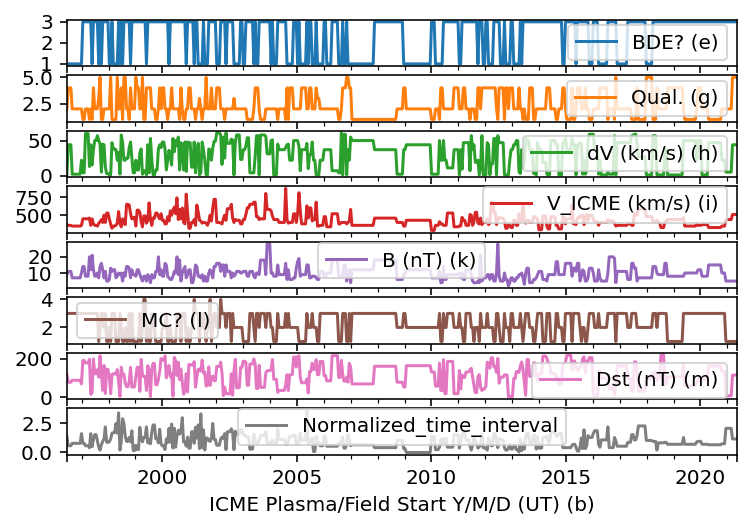

In [27]:
plot_cols = df.columns
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

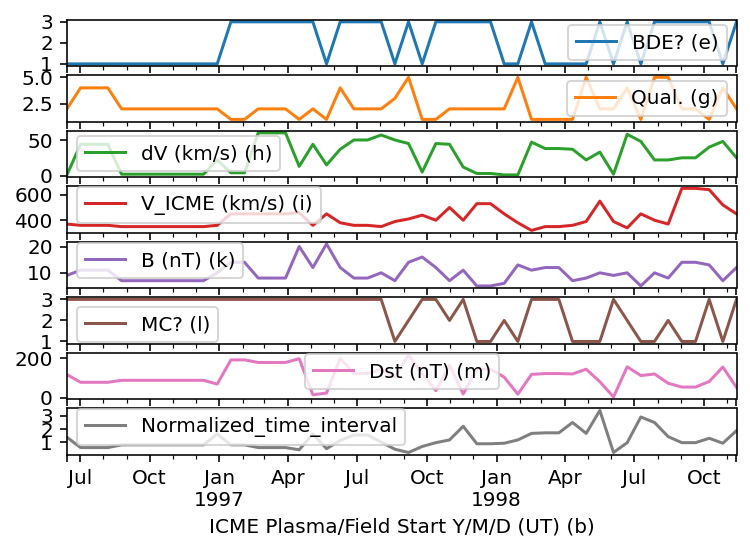

In [28]:
plot_features = df[plot_cols][:50]
plot_features.index = df[:50].index
_ = plot_features.plot(subplots=True)

## Inspect and cleanup

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BDE? (e),506.0,2.300395,0.954759,1.0,1.000000,3.000000,3.000000,3.000
Qual. (g),506.0,2.308300,1.187313,1.0,1.000000,2.000000,4.000000,5.000
dV (km/s) (h),506.0,30.110672,20.192431,1.0,7.000000,37.000000,47.000000,61.000
V_ICME (km/s) (i),506.0,435.691700,89.661717,290.0,360.000000,430.000000,470.000000,870.000
B (nT) (k),506.0,10.193676,4.200665,2.0,7.000000,9.000000,12.000000,28.000
MC? (l),506.0,2.258893,0.812142,1.0,2.000000,2.000000,3.000000,4.000
Dst (nT) (m),506.0,115.468379,57.169299,1.0,69.000000,116.000000,163.000000,220.000
Normalized_time_interval,506.0,0.962204,0.601716,0.0,0.541667,0.833333,1.291667,3.625


all mean and max values are in range (no 999 or -999 is observed)

## Fast Fourier Transform

To check for any frequncy in data apply the FFT as follow.

2021-10-28 20:26:16.473102: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


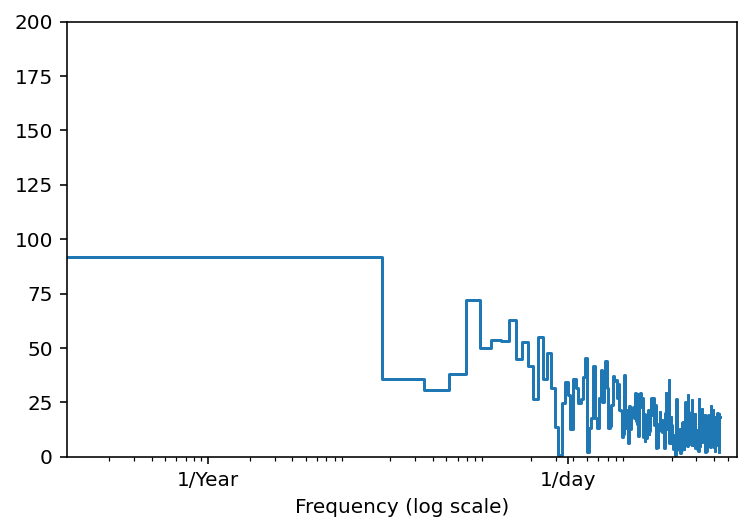

In [30]:
col = 'BDE? (e)'


fft = tf.signal.rfft(df[col])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[col])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 200)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

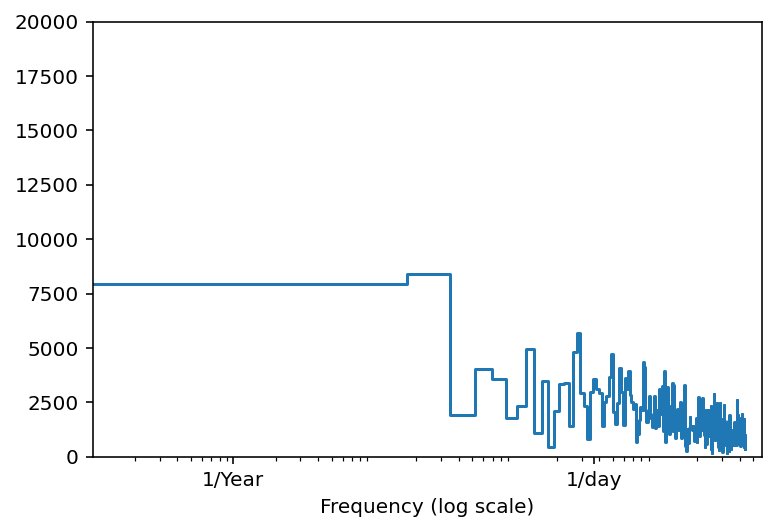

In [31]:
col = 'V_ICME (km/s) (i)'


fft = tf.signal.rfft(df[col])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[col])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 20000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

no frequency was observed.

Text(0, 0.5, 'time_interval')

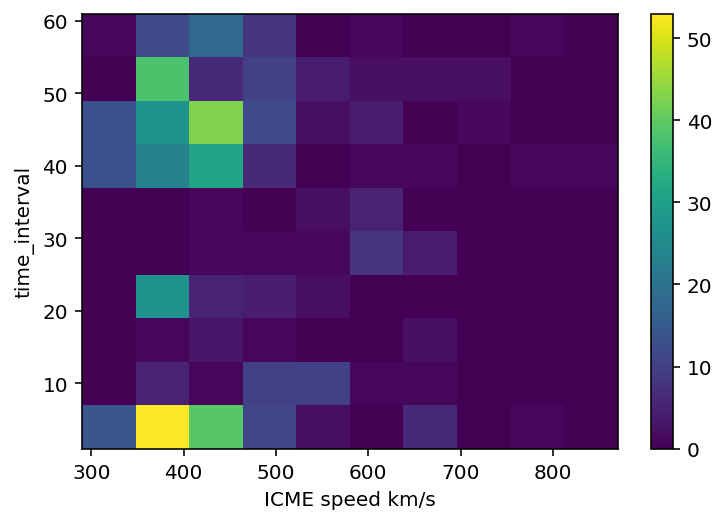

In [32]:
col1, col2 = ['V_ICME (km/s) (i)', 'dV (km/s) (h)']

plt.hist2d(df[col1], 
           df[col2])#, bins=(30, 30))#, bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('ICME speed km/s')
plt.ylabel('time_interval')

Text(0, 0.5, 'time_interval')

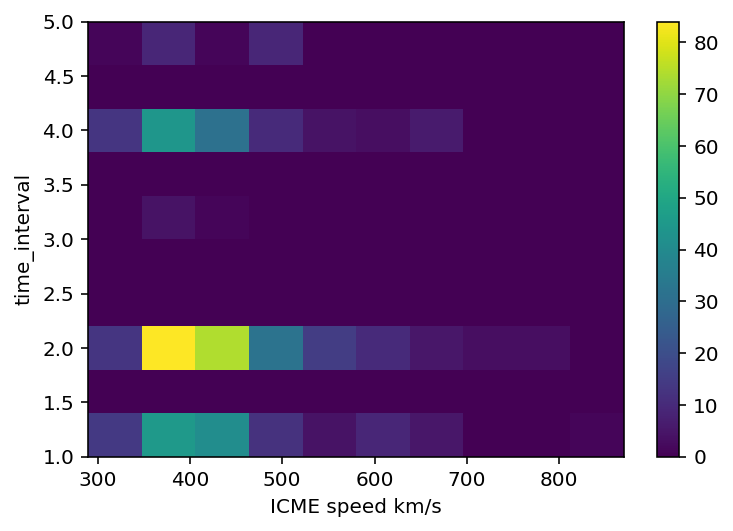

In [33]:
col1, col2 = ['V_ICME (km/s) (i)', 'Qual. (g)']

plt.hist2d(df[col1], 
           df[col2])#, bins=(30, 30))#, bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('ICME speed km/s')
plt.ylabel('time_interval')

Text(0, 0.5, 'Normalized_time_interval')

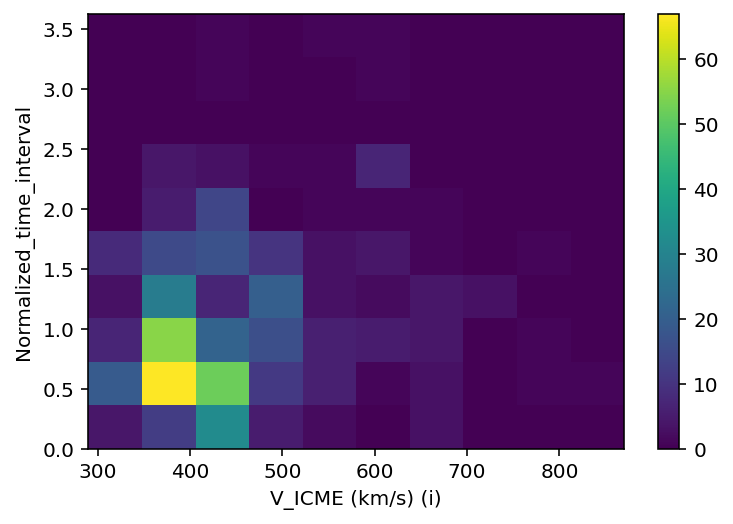

In [34]:
col1, col2 = ['V_ICME (km/s) (i)', 'Normalized_time_interval']

plt.hist2d(df[col1], 
           df[col2]) # bins=(30, 30))#, bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel(col1)
plt.ylabel(col2)

## Split the data

In [35]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [36]:
column_indices

{'BDE? (e)': 0,
 'Qual. (g)': 1,
 'dV (km/s) (h)': 2,
 'V_ICME (km/s) (i)': 3,
 'B (nT) (k)': 4,
 'MC? (l)': 5,
 'Dst (nT) (m)': 6,
 'Normalized_time_interval': 7}

## Normalization



**NOTE:** 

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets (ref: tf_website). It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages.


Normalizing data using average appraoch.

In [37]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

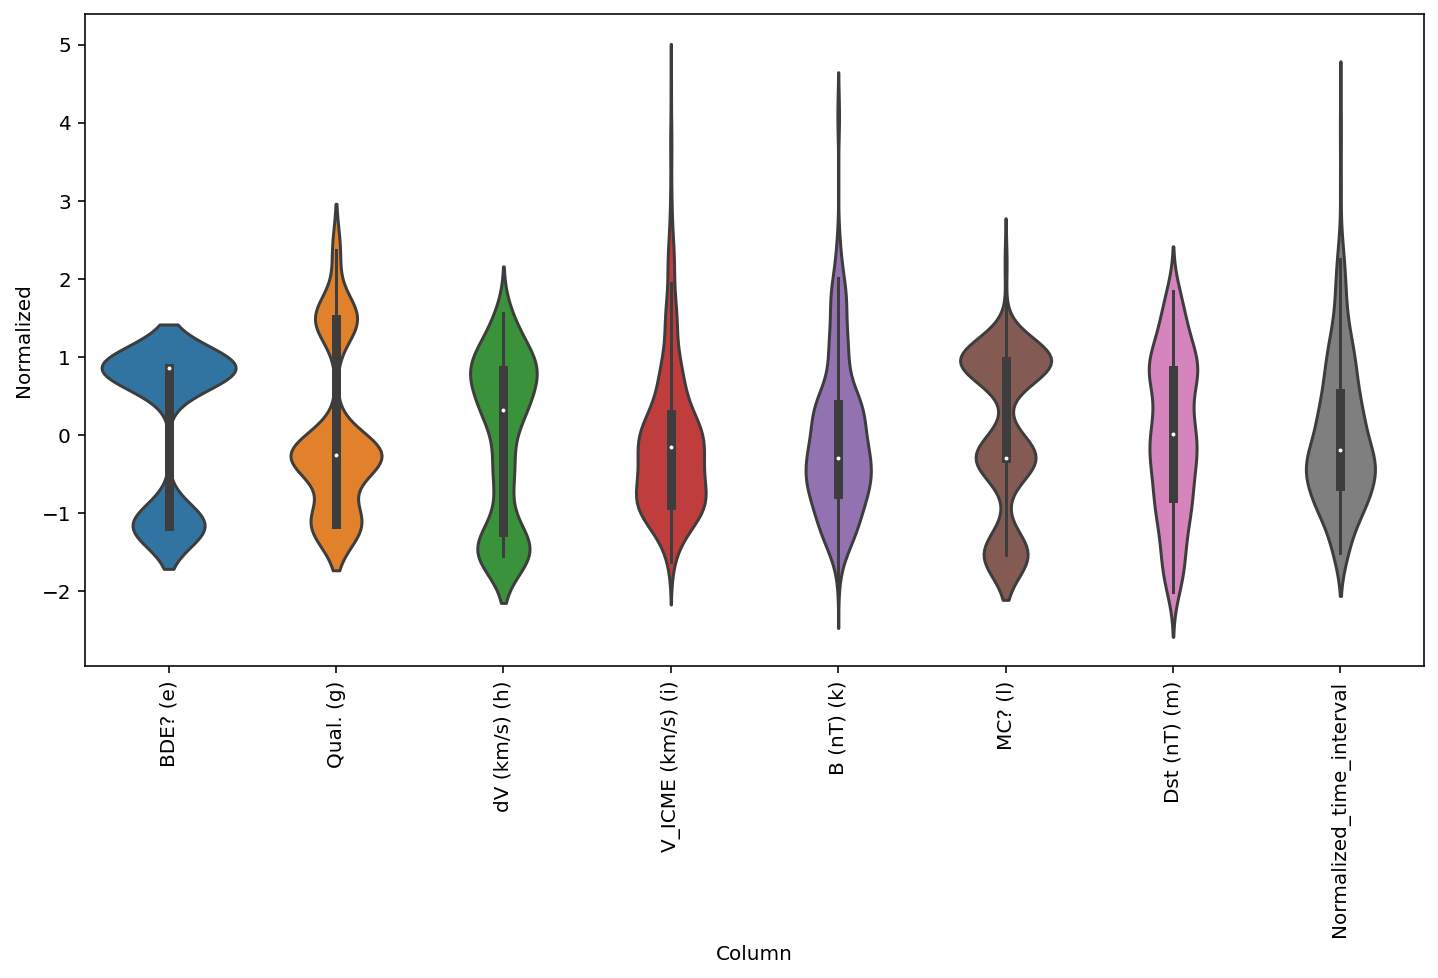

In [38]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Data windowing


In [39]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

        def __repr__(self):
            return '\n'.join([
                f'Total window size: {self.total_window_size}',
                f'Input indices: {self.input_indices}',
                f'Label indices: {self.label_indices}',
                f'Label column name(s): {self.label_columns}'])

For example, to make a single prediction 24 hours into the future, given 24 hours of history, you might define window like this (ref: ts website toturial):

<p align="left">
  <img width="600" src="../Assets/w1.png" >
</p>

[source](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en)

In [40]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['V_ICME (km/s) (i)'])
print(w1.total_window_size)
print(w1.label_indices)
print(w1.input_indices)

48
[47]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


A model that makes a prediction one hour into the future, given six hours of history, would need a window like this:

<p align="left">
  <img width="400" src="../Assets/w2.png" >
</p>

[source](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en)

In [41]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['V_ICME (km/s) (i)'])
print(w2.total_window_size)
print(w2.label_indices)
print(w2.input_indices)

7
[6]
[0 1 2 3 4 5]


## Split

In [42]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [43]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 8)
Inputs shape: (3, 6, 8)
Labels shape: (3, 1, 1)


## Plot window visualization

In [48]:
w2.example = example_inputs, example_labels

In [49]:

col = 'V_ICME (km/s) (i)'


def plot(self, model=None, plot_col=col, max_subplots=3):
    
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:

            pass

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)

        if model is not None:

            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

    if n == 0:
        plt.legend()

    plt.xlabel(col)

WindowGenerator.plot = plot

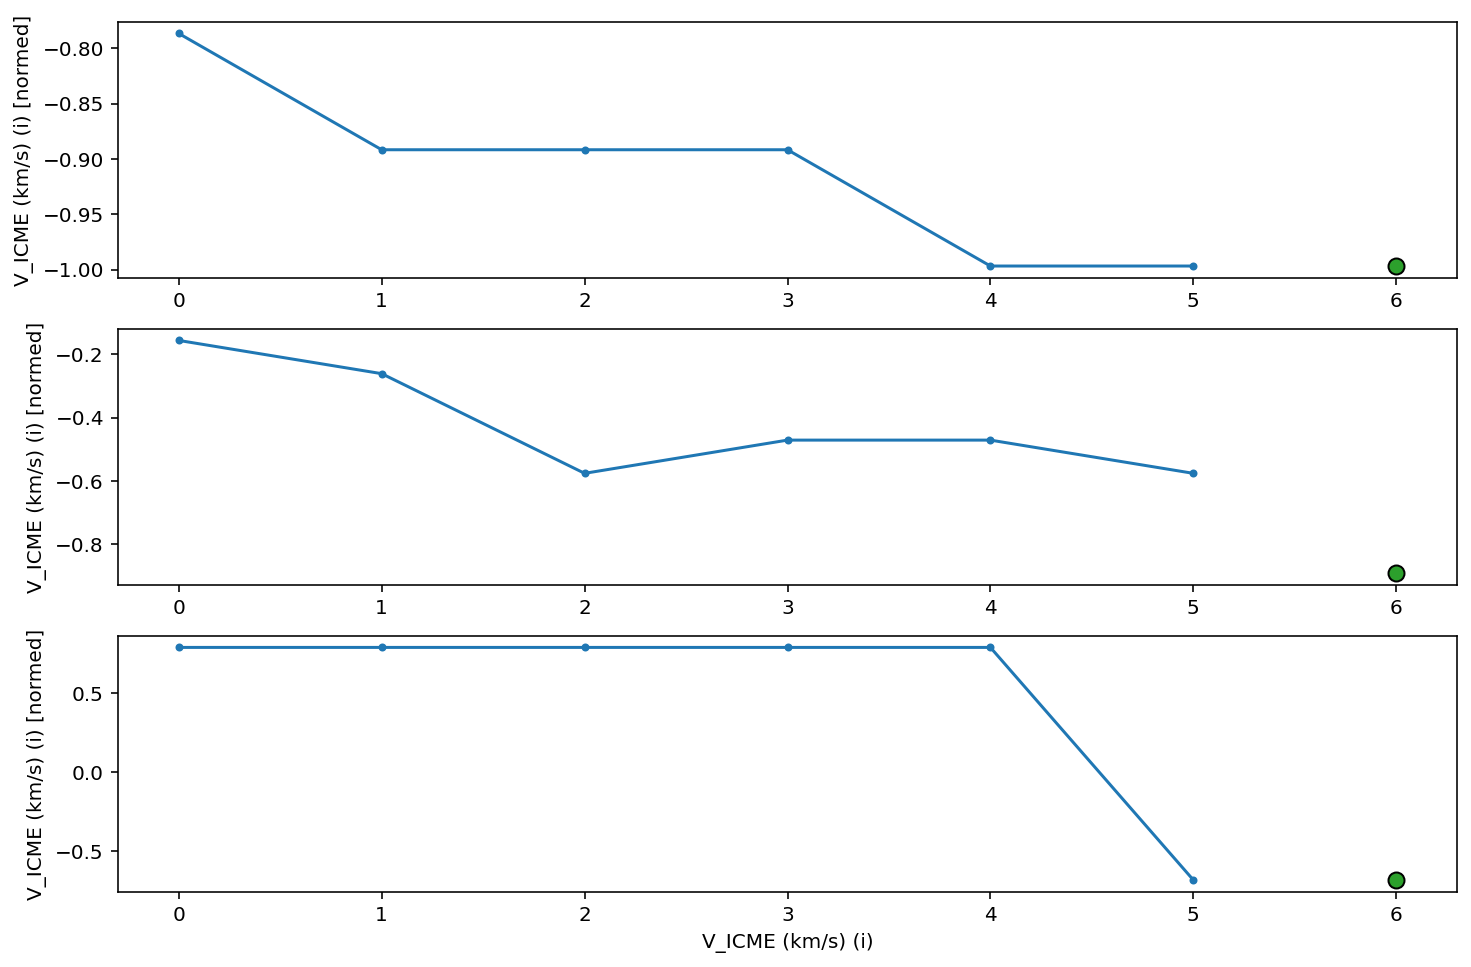

In [50]:
w2.plot()

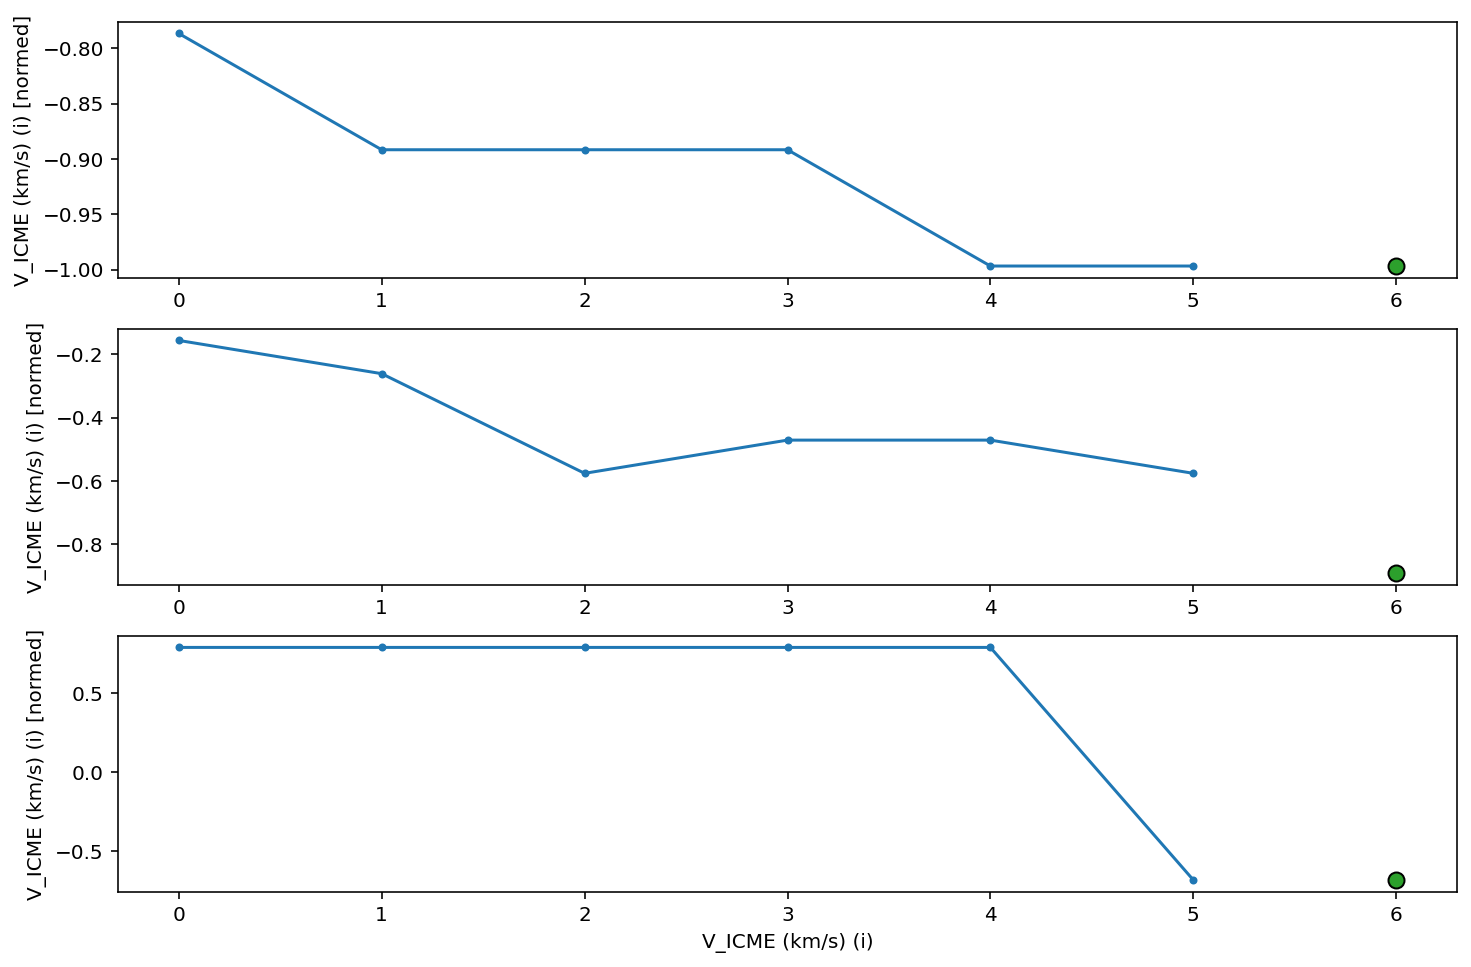

In [51]:

col = 'V_ICME (km/s) (i)'
w2.plot(model=None, plot_col=col, max_subplots=3)

## Create tf.data.Datasets

In [52]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [53]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    
    if result is None:
        
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
        
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [54]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 8), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [55]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)


2021-10-28 20:27:44.201368: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


# Single step models

In [56]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['V_ICME (km/s) (i)'])
single_step_window

In [57]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline

In [58]:
class Baseline(tf.keras.Model):
    
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [59]:
baseline = Baseline(label_index=column_indices['V_ICME (km/s) (i)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

4/4 [==============================] - 0s 2ms/step - loss: 0.4414 - mean_absolute_error: 0.3425


In [60]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['V_ICME (km/s) (i)'])

wide_window

In [61]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 8)
Output shape: (32, 24, 1)


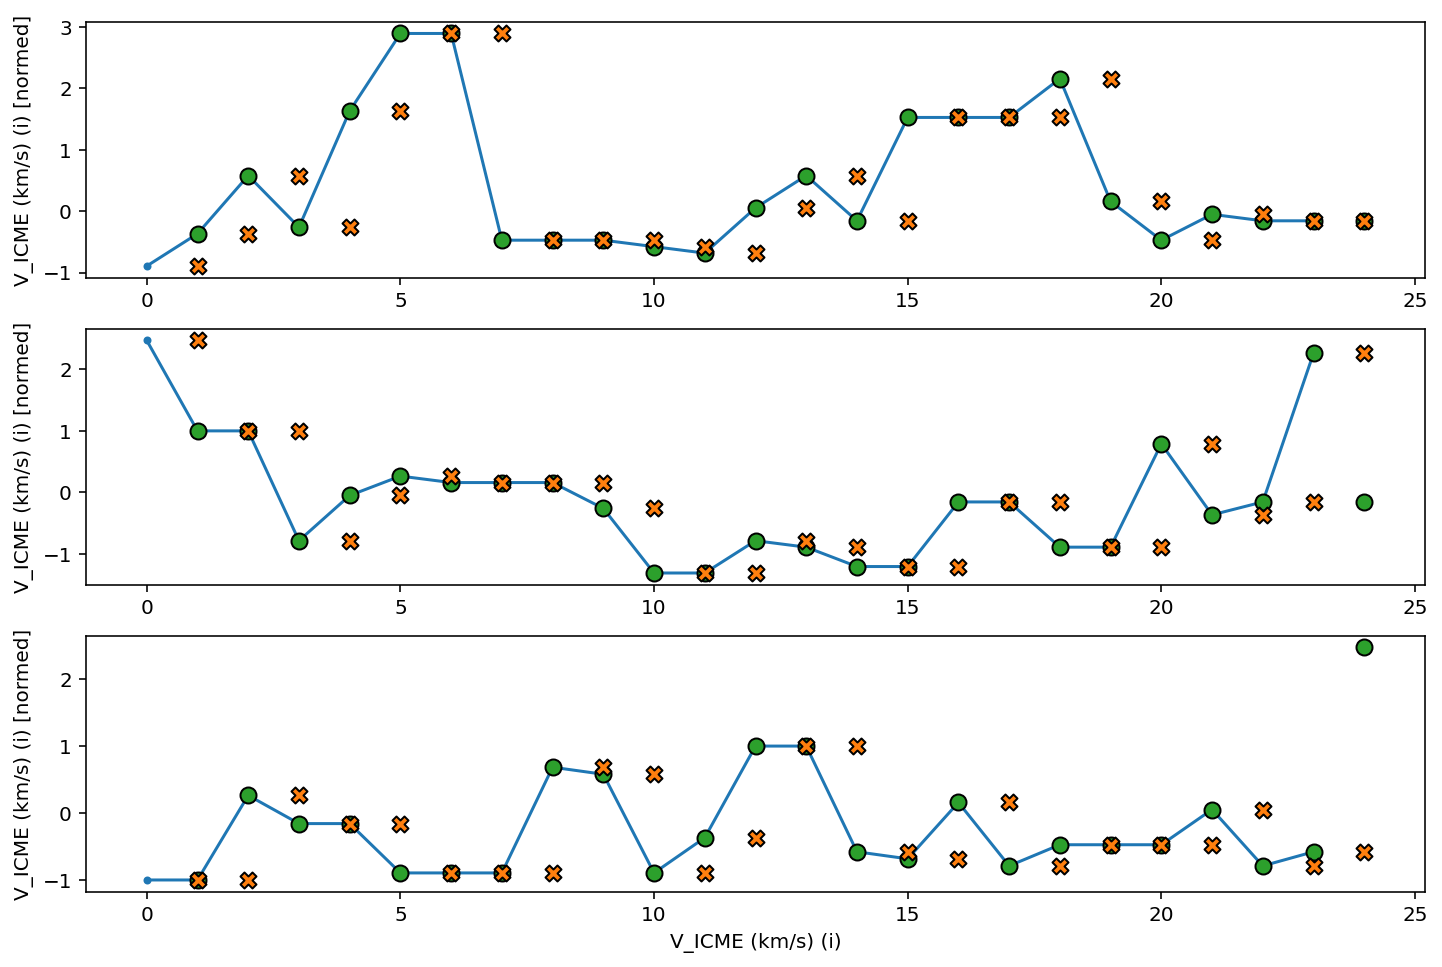

In [62]:
wide_window.plot(baseline)

# Linear model


A tf.keras.layers.Dense layer with no activation set is a linear model. 

In [63]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [64]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 8)
Output shape: (32, 1, 1)


In [65]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [66]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
12/12 [==============================] - 0s 13ms/step - loss: 3.2550 - mean_absolute_error: 1.4851 - val_loss: 1.7246 - val_mean_absolute_error: 1.0953
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 3.1634 - mean_absolute_error: 1.4620 - val_loss: 1.6848 - val_mean_absolute_error: 1.0830
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 3.0740 - mean_absolute_error: 1.4395 - val_loss: 1.6450 - val_mean_absolute_error: 1.0705
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 2.9877 - mean_absolute_error: 1.4175 - val_loss: 1.6042 - val_mean_absolute_error: 1.0572
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 2.9031 - mean_absolute_error: 1.3958 - val_loss: 1.5667 - val_mean_absolute_error: 1.0447
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 2.8217 - mean_absolute_error: 1.3738 - val_loss: 1.5256 - val_mean_absolute_error: 1.0306
Epoch 7/20
12/12 [=========

In [67]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 8)
Output shape: (32, 24, 1)


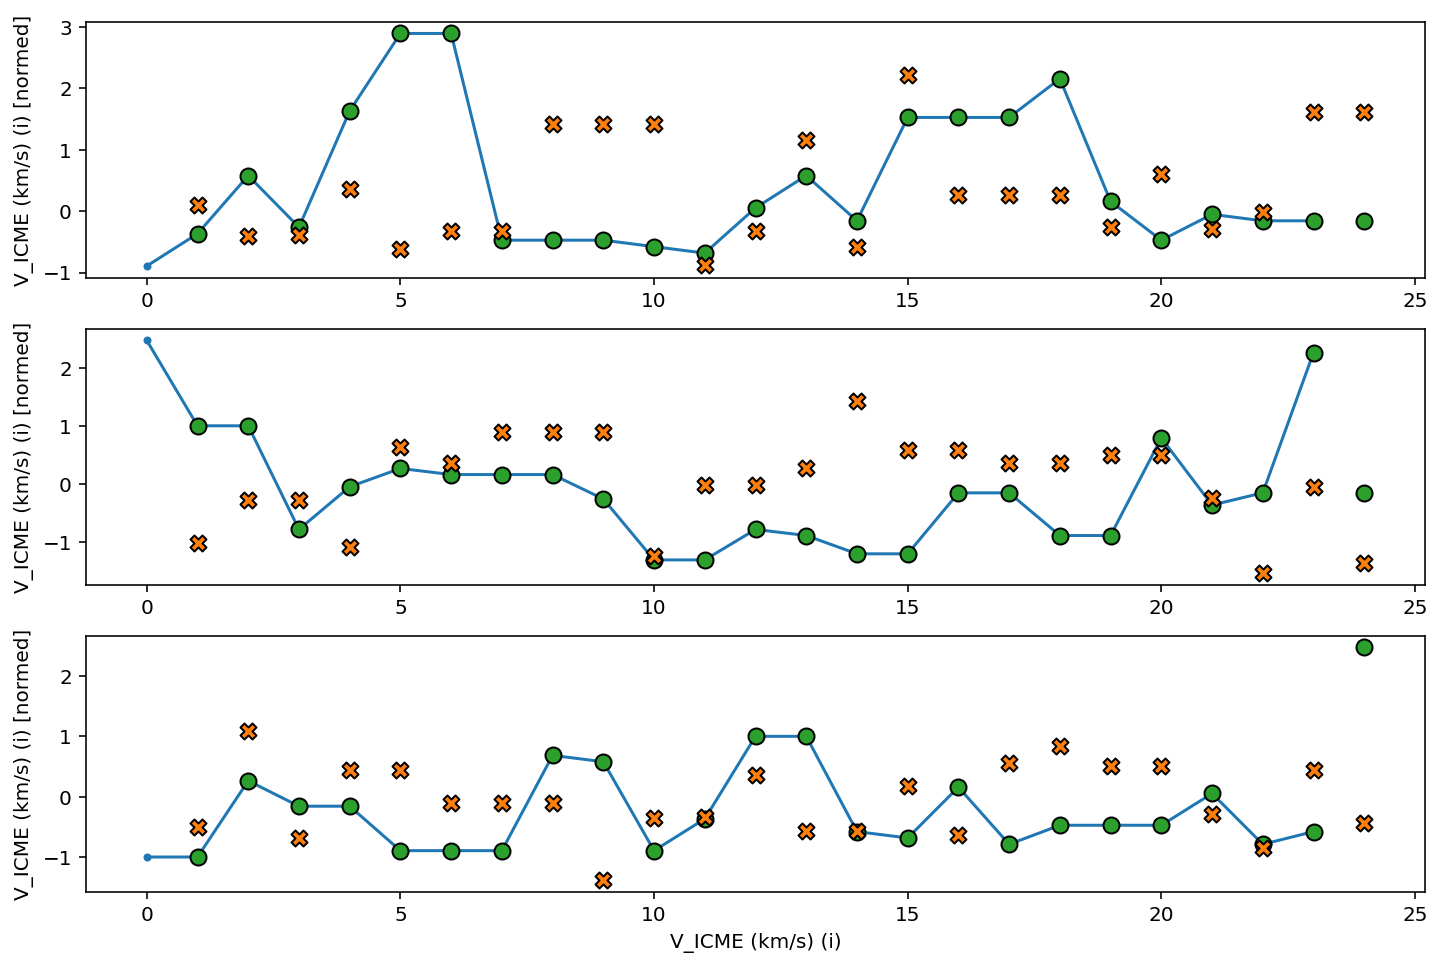

In [68]:
wide_window.plot(linear)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights and visualize the weight assigned to each input:

[ref](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=en)

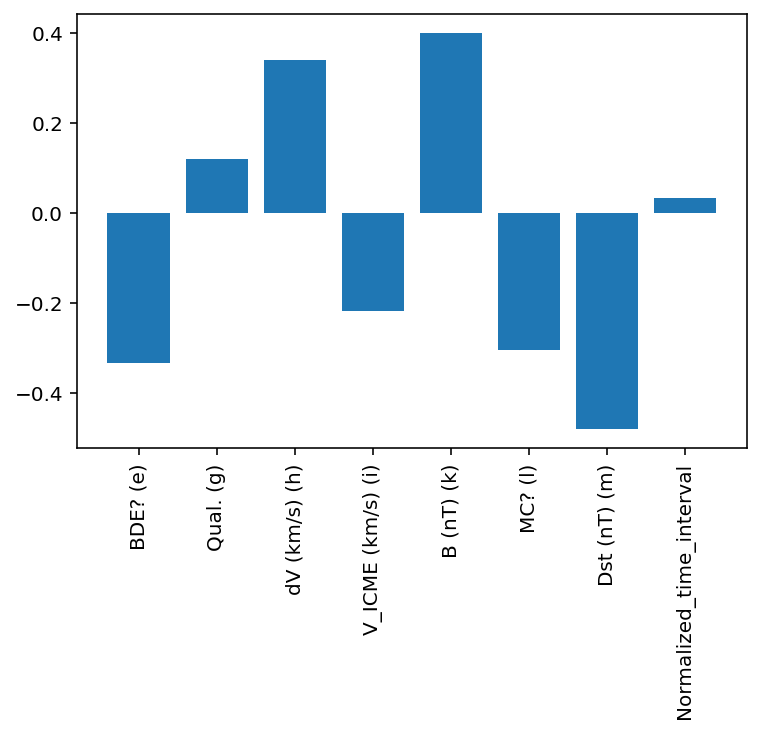

In [69]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

# Dense

In [70]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
12/12 [==============================] - 1s 18ms/step - loss: 0.8968 - mean_absolute_error: 0.6804 - val_loss: 0.5252 - val_mean_absolute_error: 0.5982
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.7897 - mean_absolute_error: 0.6257 - val_loss: 0.5183 - val_mean_absolute_error: 0.5936
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 0.7477 - mean_absolute_error: 0.5906 - val_loss: 0.4836 - val_mean_absolute_error: 0.5680
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 0.7332 - mean_absolute_error: 0.5946 - val_loss: 0.4960 - val_mean_absolute_error: 0.5746
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.7095 - mean_absolute_error: 0.5764 - val_loss: 0.4751 - val_mean_absolute_error: 0.5522
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 0.6975 - mean_absolute_error: 0.5598 - val_loss: 0.4800 - val_mean_absolute_error: 0.5532
Epoch 7/20
4/4 [===========

## Multi-step dense

The baseline, linear and dense models handled each time step independently. Here the model will take multiple time steps as input to produce a single output.

In [71]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['V_ICME (km/s) (i)'])

conv_window

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

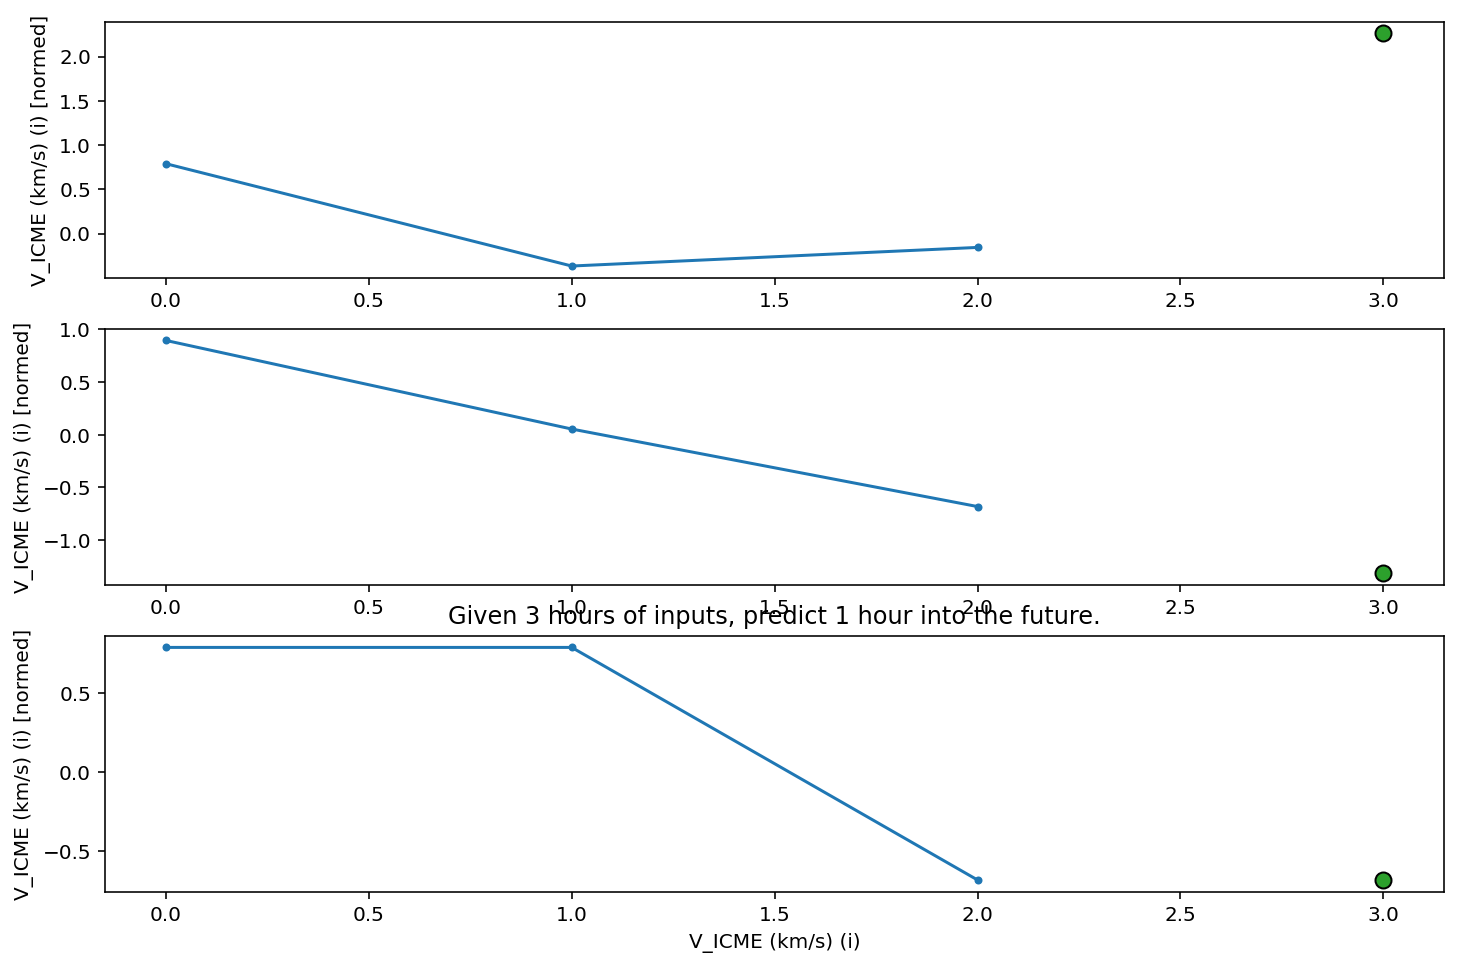

In [72]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [73]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [74]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 8)
Output shape: (32, 1, 1)


In [75]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/20
11/11 [==============================] - 0s 14ms/step - loss: 1.8027 - mean_absolute_error: 1.0912 - val_loss: 0.9140 - val_mean_absolute_error: 0.7845
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 1.1971 - mean_absolute_error: 0.8518 - val_loss: 0.7279 - val_mean_absolute_error: 0.7012
Epoch 3/20
11/11 [==============================] - 0s 7ms/step - loss: 1.0072 - mean_absolute_error: 0.7368 - val_loss: 0.6770 - val_mean_absolute_error: 0.6663
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 0.8824 - mean_absolute_error: 0.6866 - val_loss: 0.6824 - val_mean_absolute_error: 0.6644
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6781 - mean_absolute_error: 0.6617


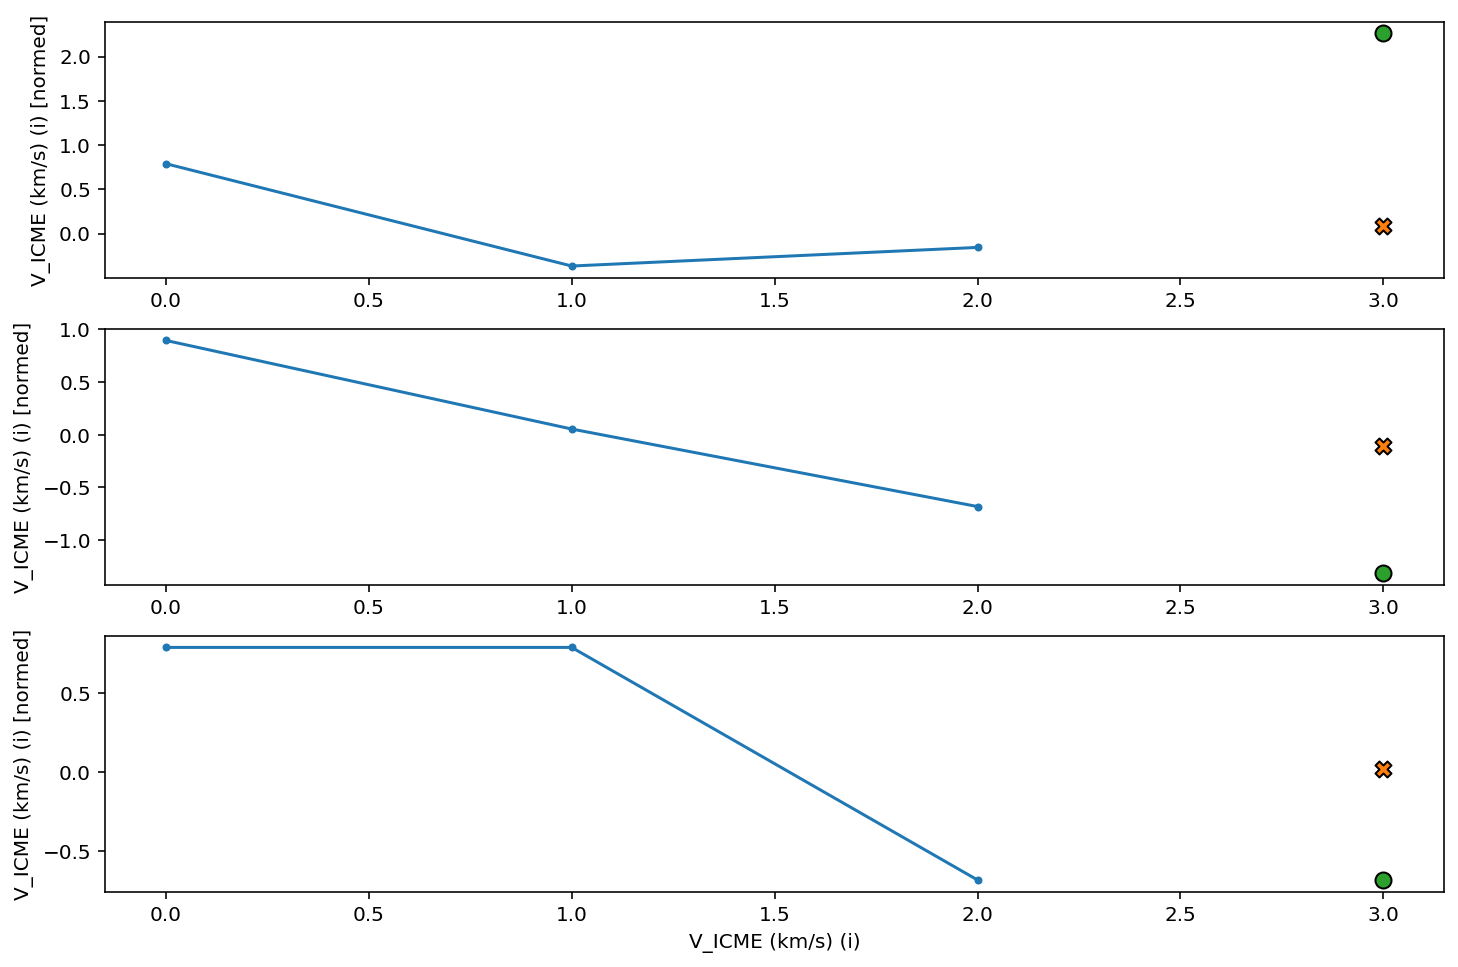

In [76]:
conv_window.plot(multi_step_dense)

In [77]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 8)

ValueError:Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 24 but received input with shape (32, 192)


# Convolution neural network



<p align="left">
  <img width="400" src="../Assets/cnn.png" >
</p>

In [78]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [79]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 8)
Output shape: (32, 1, 1)


In [80]:
history = compile_and_fit(conv_model, conv_window)

# IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/20
11/11 [==============================] - 1s 17ms/step - loss: 1.0743 - mean_absolute_error: 0.8061 - val_loss: 0.7314 - val_mean_absolute_error: 0.7048
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 0.8993 - mean_absolute_error: 0.6889 - val_loss: 0.6444 - val_mean_absolute_error: 0.6495
Epoch 3/20
11/11 [==============================] - 0s 7ms/step - loss: 0.8093 - mean_absolute_error: 0.6456 - val_loss: 0.6319 - val_mean_absolute_error: 0.6317
Epoch 4/20
11/11 [==============================] - 0s 7ms/step - loss: 0.7482 - mean_absolute_error: 0.6248 - val_loss: 0.6298 - val_mean_absolute_error: 0.6252
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 0.7121 - mean_absolute_error: 0.6056 - val_loss: 0.6206 - val_mean_absolute_error: 0.6200
Epoch 6/20
11/11 [==============================] - 0s 7ms/step - loss: 0.6788 - mean_absolute_error: 0.5883 - val_loss: 0.6174 - val_mean_absolute_error: 0.6162
Epoch 7/20
11/11 [=========

In [81]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 8)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [82]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['V_ICME (km/s) (i)'])

wide_conv_window

In [83]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 8)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


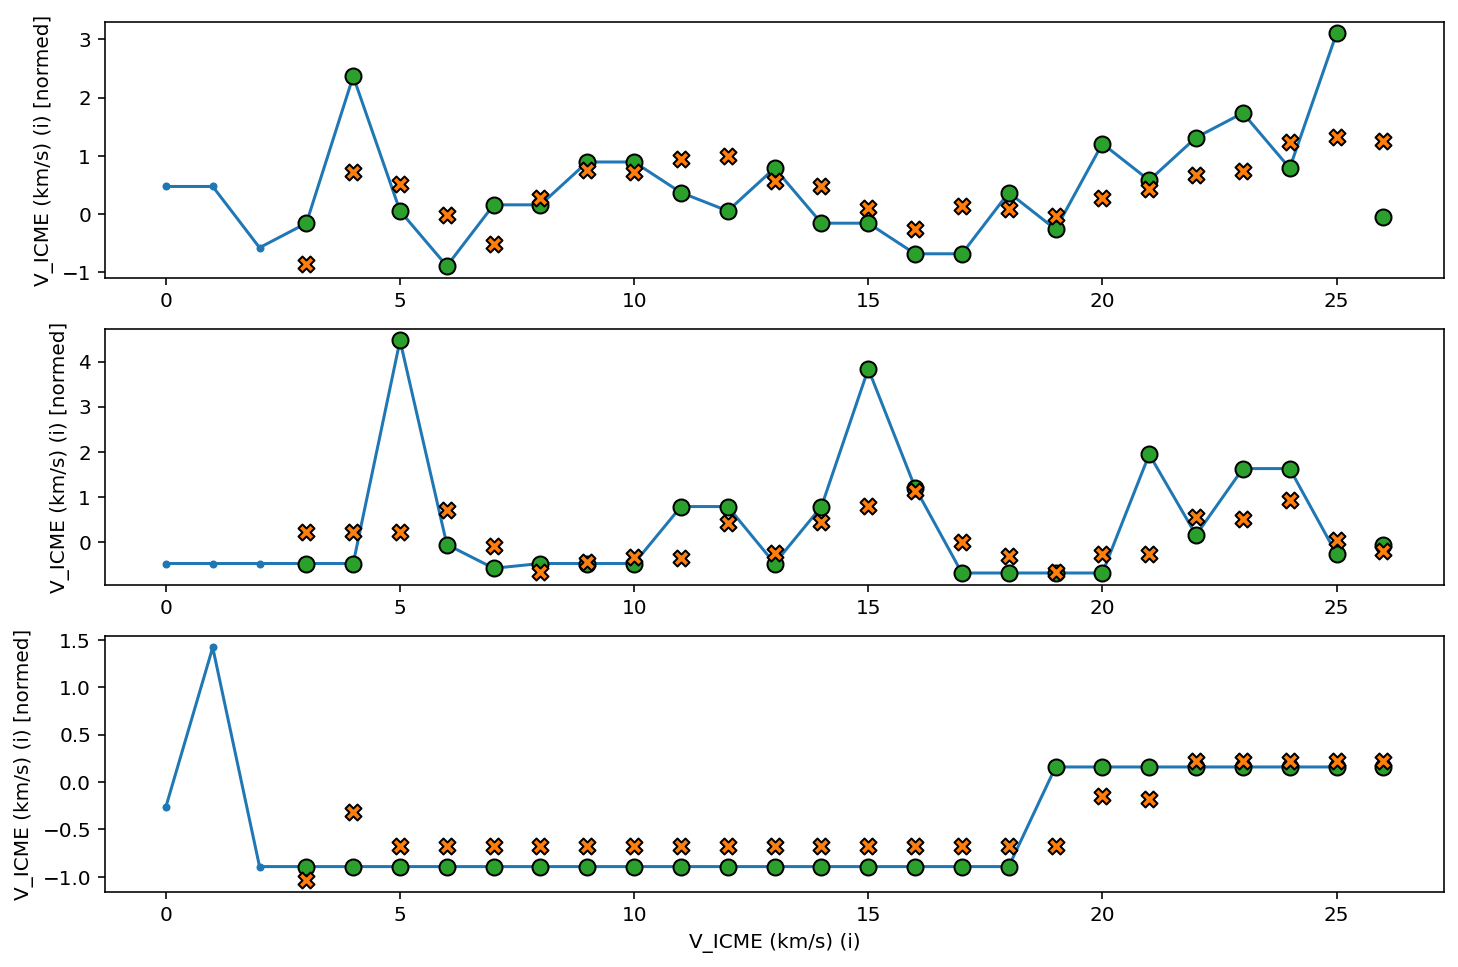

In [84]:
wide_conv_window.plot(conv_model)

# Recurrent neural network

In [85]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [86]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 8)
Output shape: (32, 24, 1)


In [87]:
history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
11/11 [==============================] - 2s 52ms/step - loss: 1.0147 - mean_absolute_error: 0.7767 - val_loss: 0.5689 - val_mean_absolute_error: 0.6256
Epoch 2/20
11/11 [==============================] - 0s 14ms/step - loss: 0.8931 - mean_absolute_error: 0.7183 - val_loss: 0.5273 - val_mean_absolute_error: 0.5864
Epoch 3/20
11/11 [==============================] - 0s 12ms/step - loss: 0.8384 - mean_absolute_error: 0.6863 - val_loss: 0.5144 - val_mean_absolute_error: 0.5753
Epoch 4/20
11/11 [==============================] - 0s 13ms/step - loss: 0.8013 - mean_absolute_error: 0.6624 - val_loss: 0.5079 - val_mean_absolute_error: 0.5727
Epoch 5/20
11/11 [==============================] - 0s 14ms/step - loss: 0.7679 - mean_absolute_error: 0.6435 - val_loss: 0.5158 - val_mean_absolute_error: 0.5808
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 0.5218 - mean_absolute_error: 0.5812


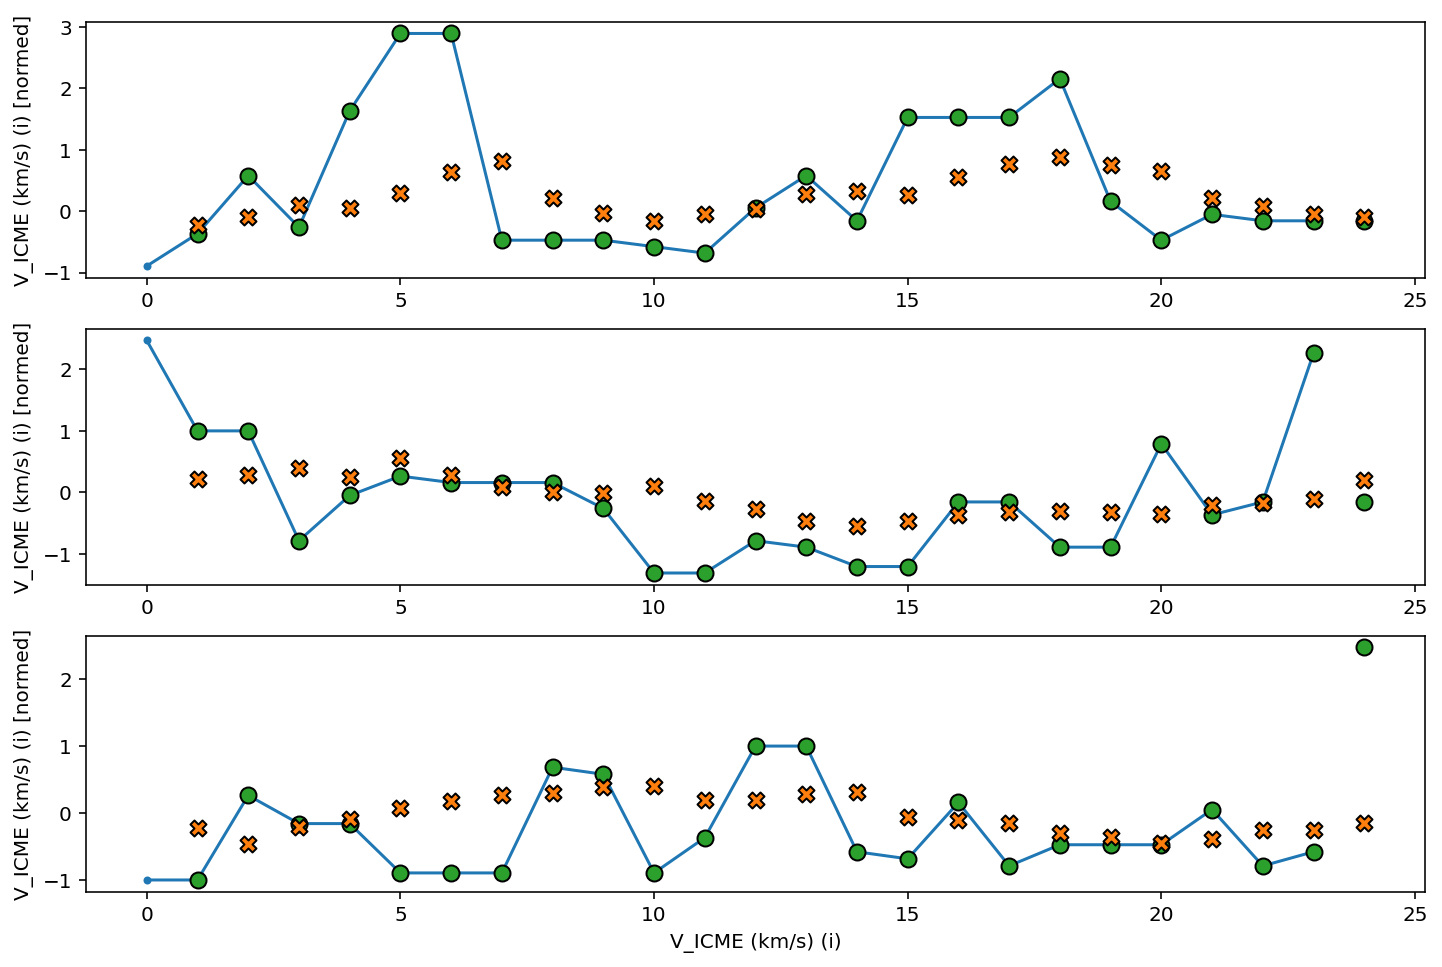

In [88]:
wide_window.plot(lstm_model)

# Performance

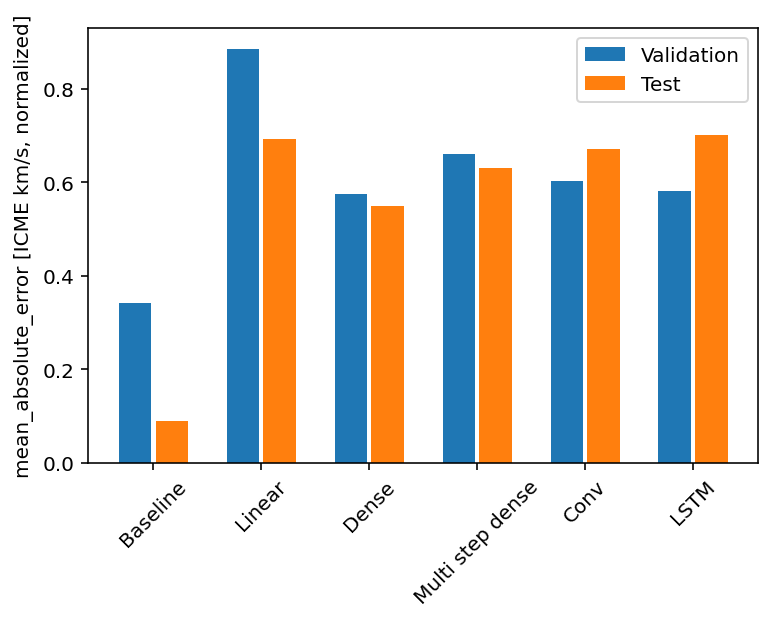

In [89]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [ICME km/s, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [90]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0904
Linear      : 0.6929
Dense       : 0.5490
Multi step dense: 0.6318
Conv        : 0.6714
LSTM        : 0.7024


# Multi-output models

In [91]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 8)
Labels shape (batch, time, features): (32, 24, 8)


### Baseline

In [92]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [93]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

3/3 [==============================] - 0s 1ms/step - loss: 0.7984 - mean_absolute_error: 0.4463


### Dense

In [94]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [95]:
history = compile_and_fit(dense, single_step_window)

# IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
12/12 [==============================] - 1s 16ms/step - loss: 0.9822 - mean_absolute_error: 0.8334 - val_loss: 0.9020 - val_mean_absolute_error: 0.8039
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.9025 - mean_absolute_error: 0.7904 - val_loss: 0.8504 - val_mean_absolute_error: 0.7723
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 0.8554 - mean_absolute_error: 0.7620 - val_loss: 0.8168 - val_mean_absolute_error: 0.7480
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 0.8244 - mean_absolute_error: 0.7410 - val_loss: 0.7927 - val_mean_absolute_error: 0.7295
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.8062 - mean_absolute_error: 0.7242 - val_loss: 0.7790 - val_mean_absolute_error: 0.7162
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 0.7908 - mean_absolute_error: 0.7122 - val_loss: 0.7741 - val_mean_absolute_error: 0.7102
Epoch 7/20
12/12 [=========

### RNN

In [96]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

Epoch 1/20
11/11 [==============================] - 2s 47ms/step - loss: 1.0227 - mean_absolute_error: 0.8374 - val_loss: 1.0212 - val_mean_absolute_error: 0.8502
Epoch 2/20
11/11 [==============================] - 0s 13ms/step - loss: 0.9603 - mean_absolute_error: 0.8122 - val_loss: 0.9882 - val_mean_absolute_error: 0.8362
Epoch 3/20
11/11 [==============================] - 0s 13ms/step - loss: 0.9152 - mean_absolute_error: 0.7933 - val_loss: 0.9712 - val_mean_absolute_error: 0.8281
Epoch 4/20
11/11 [==============================] - 0s 12ms/step - loss: 0.8825 - mean_absolute_error: 0.7780 - val_loss: 0.9615 - val_mean_absolute_error: 0.8229
Epoch 5/20
11/11 [==============================] - 0s 12ms/step - loss: 0.8593 - mean_absolute_error: 0.7647 - val_loss: 0.9512 - val_mean_absolute_error: 0.8168
Epoch 6/20
11/11 [==============================] - 0s 13ms/step - loss: 0.8397 - mean_absolute_error: 0.7525 - val_loss: 0.9401 - val_mean_absolute_error: 0.8102
Epoch 7/20
11/11 [====

# Advanced: Residual connections

In [97]:
class ResidualWrapper(tf.keras.Model):
    
    def __init__(self, model):
        super().__init__()
        self.model = model

    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)

        # The prediction for each time step is the input
        # from the previous time step plus the delta
        # calculated by the model.
        return inputs + delta

In [98]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

# IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

Epoch 1/20
11/11 [==============================] - 2s 50ms/step - loss: 1.1382 - mean_absolute_error: 0.6073 - val_loss: 0.7868 - val_mean_absolute_error: 0.4537
Epoch 2/20
11/11 [==============================] - 0s 13ms/step - loss: 1.1247 - mean_absolute_error: 0.6126 - val_loss: 0.7737 - val_mean_absolute_error: 0.4618
Epoch 3/20
11/11 [==============================] - 0s 12ms/step - loss: 1.1085 - mean_absolute_error: 0.6187 - val_loss: 0.7591 - val_mean_absolute_error: 0.4715
Epoch 4/20
11/11 [==============================] - 0s 12ms/step - loss: 1.0885 - mean_absolute_error: 0.6249 - val_loss: 0.7439 - val_mean_absolute_error: 0.4833
Epoch 5/20
11/11 [==============================] - 0s 13ms/step - loss: 1.0648 - mean_absolute_error: 0.6311 - val_loss: 0.7293 - val_mean_absolute_error: 0.4979
Epoch 6/20
11/11 [==============================] - 0s 13ms/step - loss: 1.0368 - mean_absolute_error: 0.6369 - val_loss: 0.7164 - val_mean_absolute_error: 0.5136
Epoch 7/20
11/11 [====

### Performance

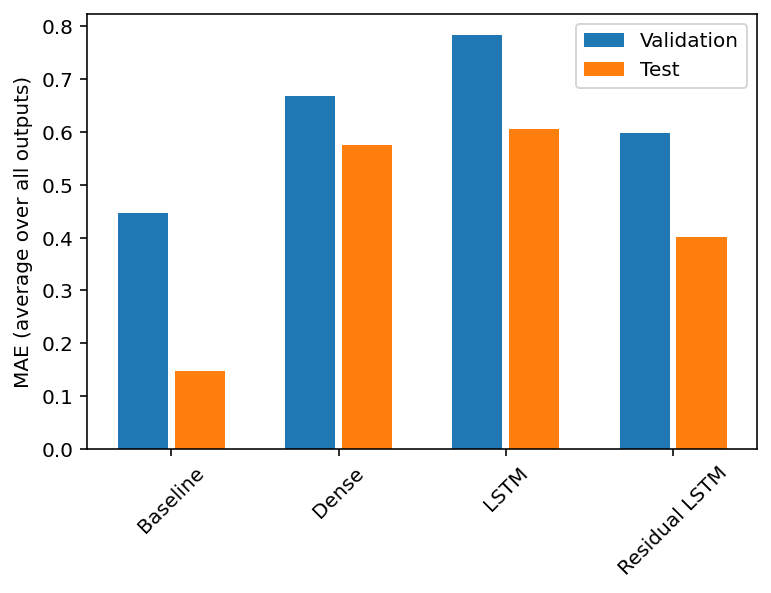

In [99]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [100]:
for name, value in performance.items():
    print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1472
Dense          : 0.5756
LSTM           : 0.6058
Residual LSTM  : 0.4018


# Multi-step models

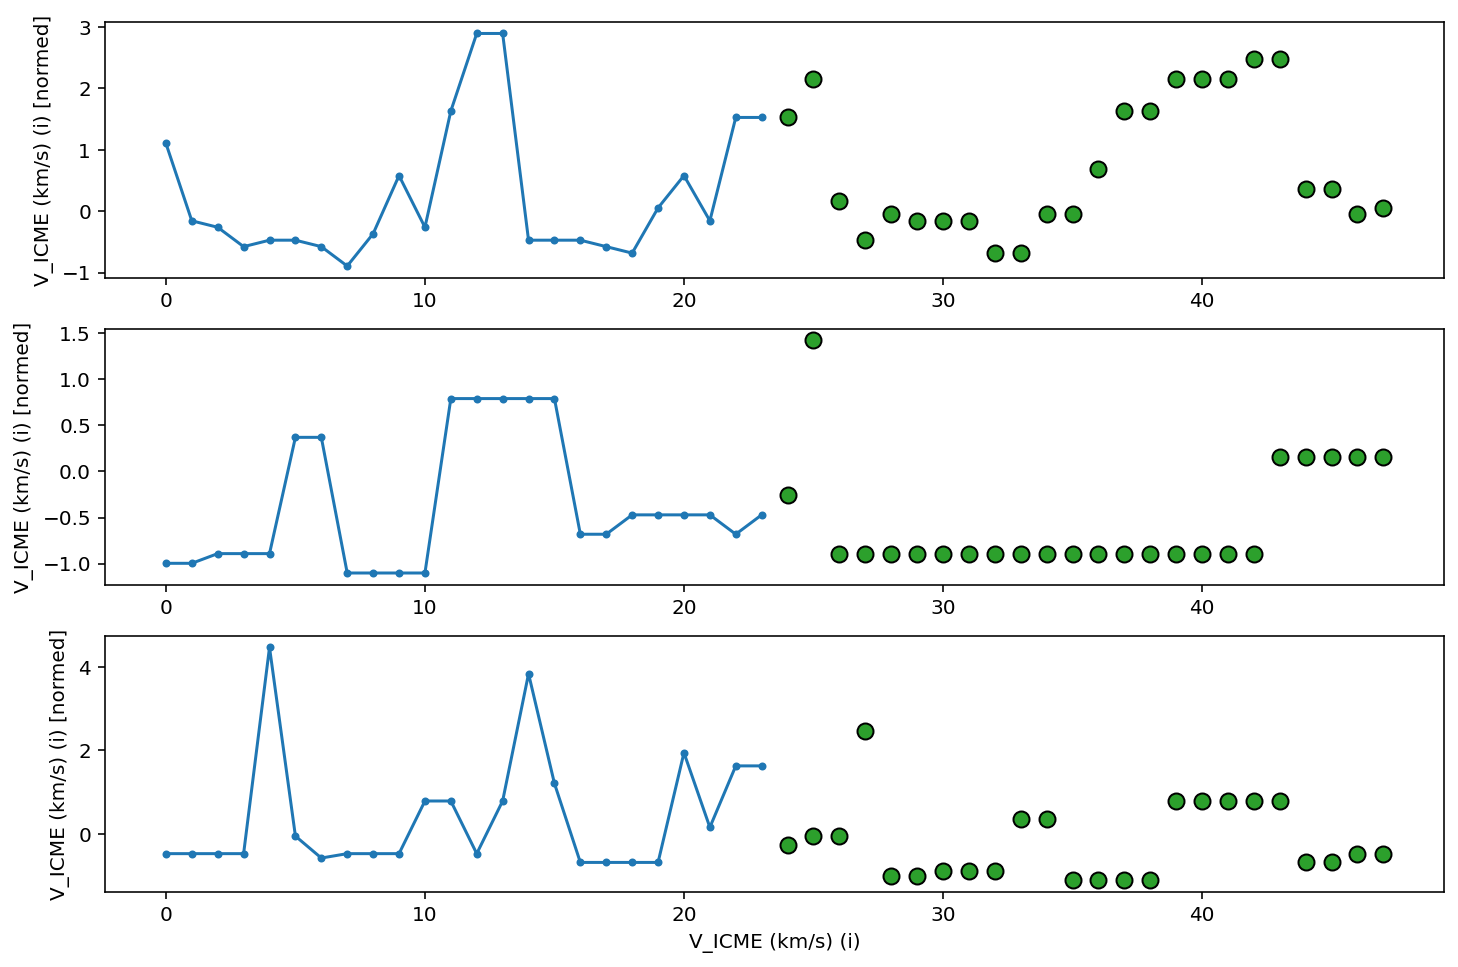

In [116]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baselines




<p align="left">
  <img width="400" src="../Assets/base_multi.png" >
</p>


2/2 [==============================] - 0s 2ms/step - loss: 2.0156 - mean_absolute_error: 1.0762


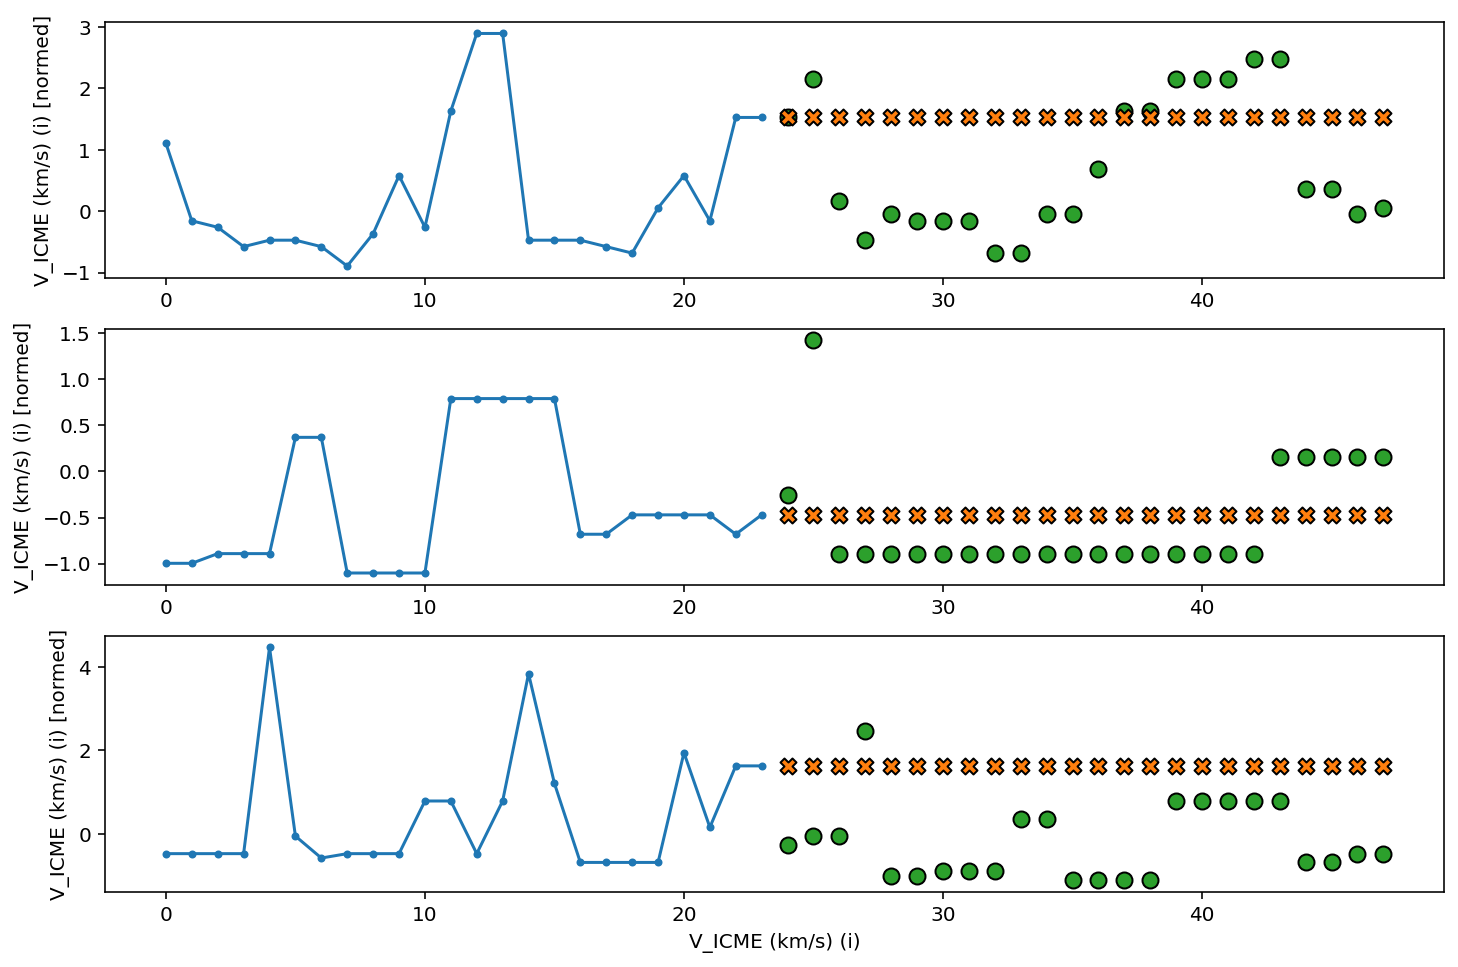

In [117]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)



<p align="left">
  <img width="400" src="../Assets/repeat_bs.png" >
</p>

2/2 [==============================] - 0s 2ms/step - loss: 2.2523 - mean_absolute_error: 1.1984


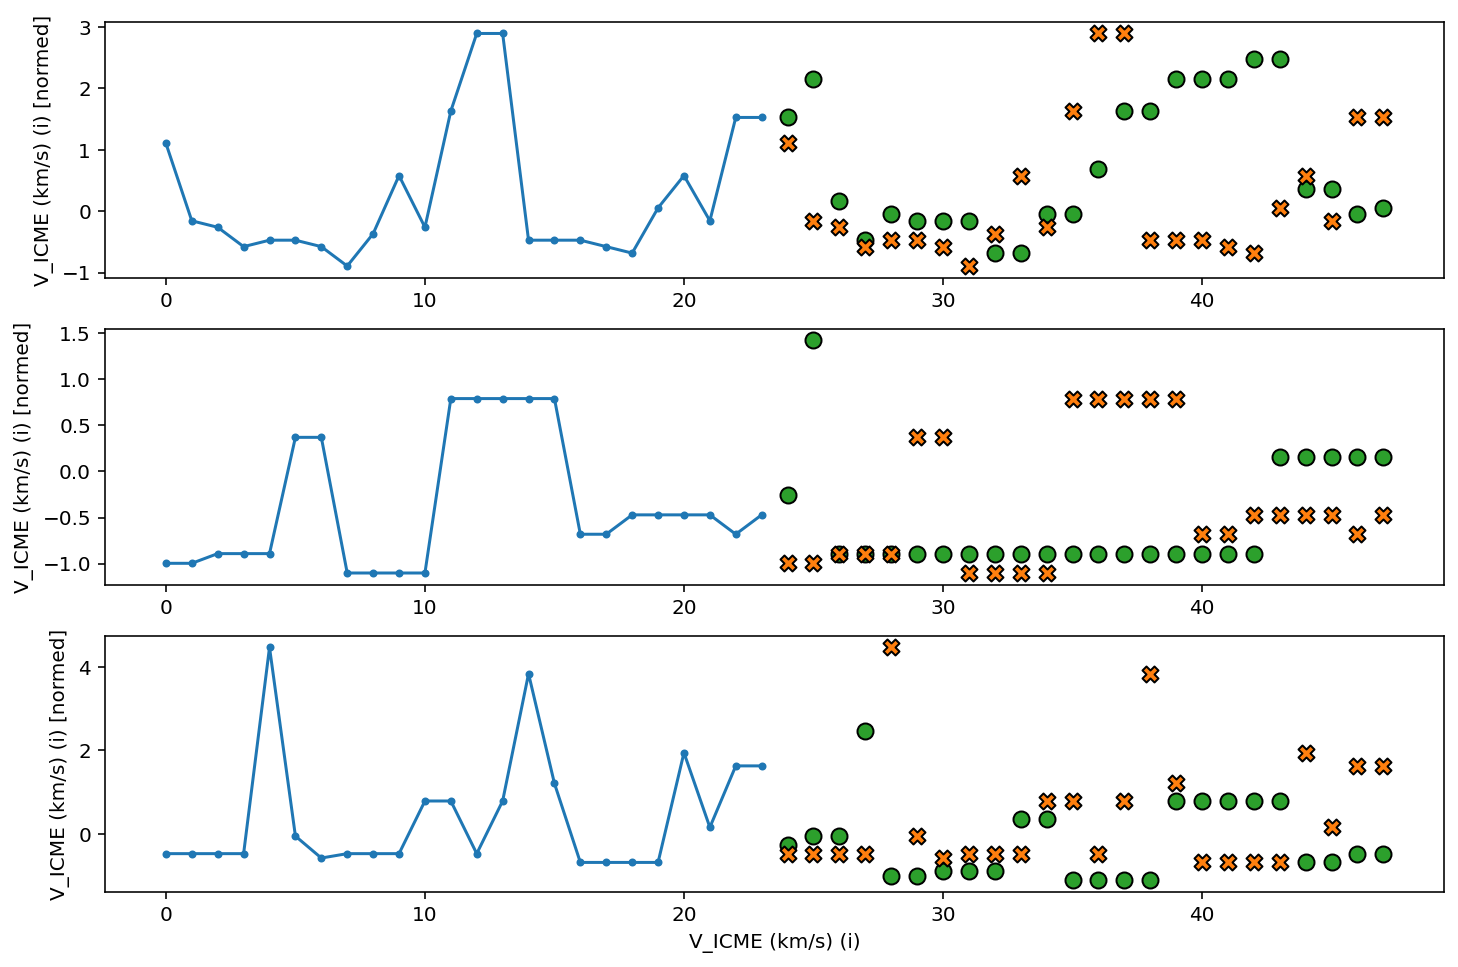

In [118]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

# Single-shot models

## Linear

<p align="left">
  <img width="400" src="../Assets/sing_ln.png" >
</p>

Epoch 1/20
10/10 [==============================] - 0s 15ms/step - loss: 1.0072 - mean_absolute_error: 0.8407 - val_loss: 1.0112 - val_mean_absolute_error: 0.8607
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 0.9998 - mean_absolute_error: 0.8375 - val_loss: 1.0133 - val_mean_absolute_error: 0.8611
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 1.0157 - mean_absolute_error: 0.8616


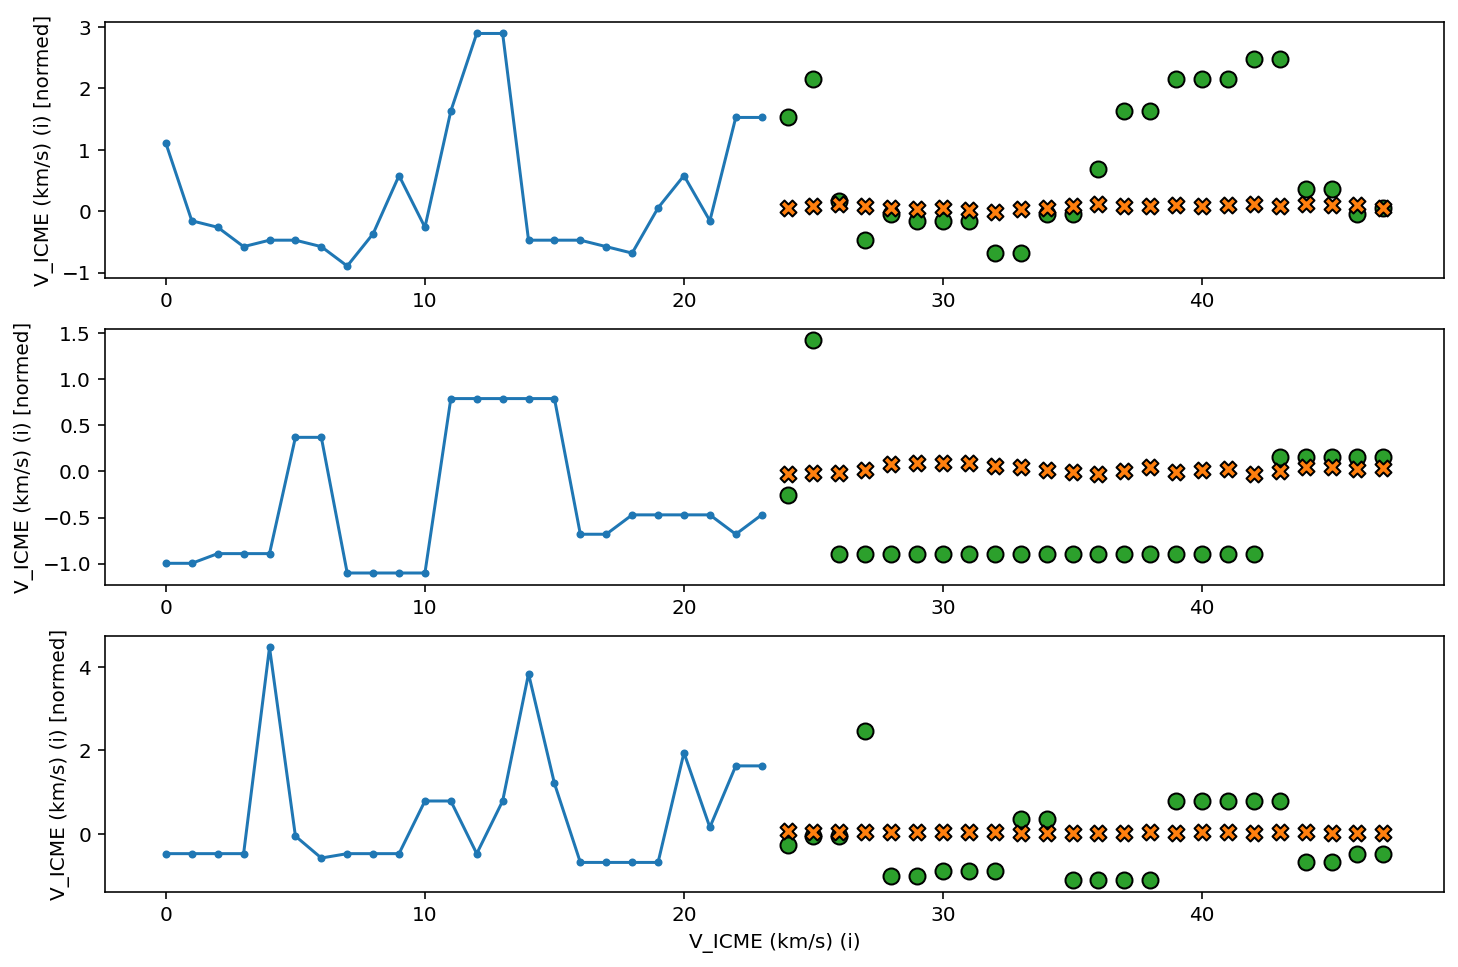

In [119]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

# IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

## Dense

Epoch 1/20
10/10 [==============================] - 1s 21ms/step - loss: 1.0023 - mean_absolute_error: 0.8372 - val_loss: 1.0242 - val_mean_absolute_error: 0.8628
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.9655 - mean_absolute_error: 0.8200 - val_loss: 1.0427 - val_mean_absolute_error: 0.8673
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 1.0689 - mean_absolute_error: 0.8749


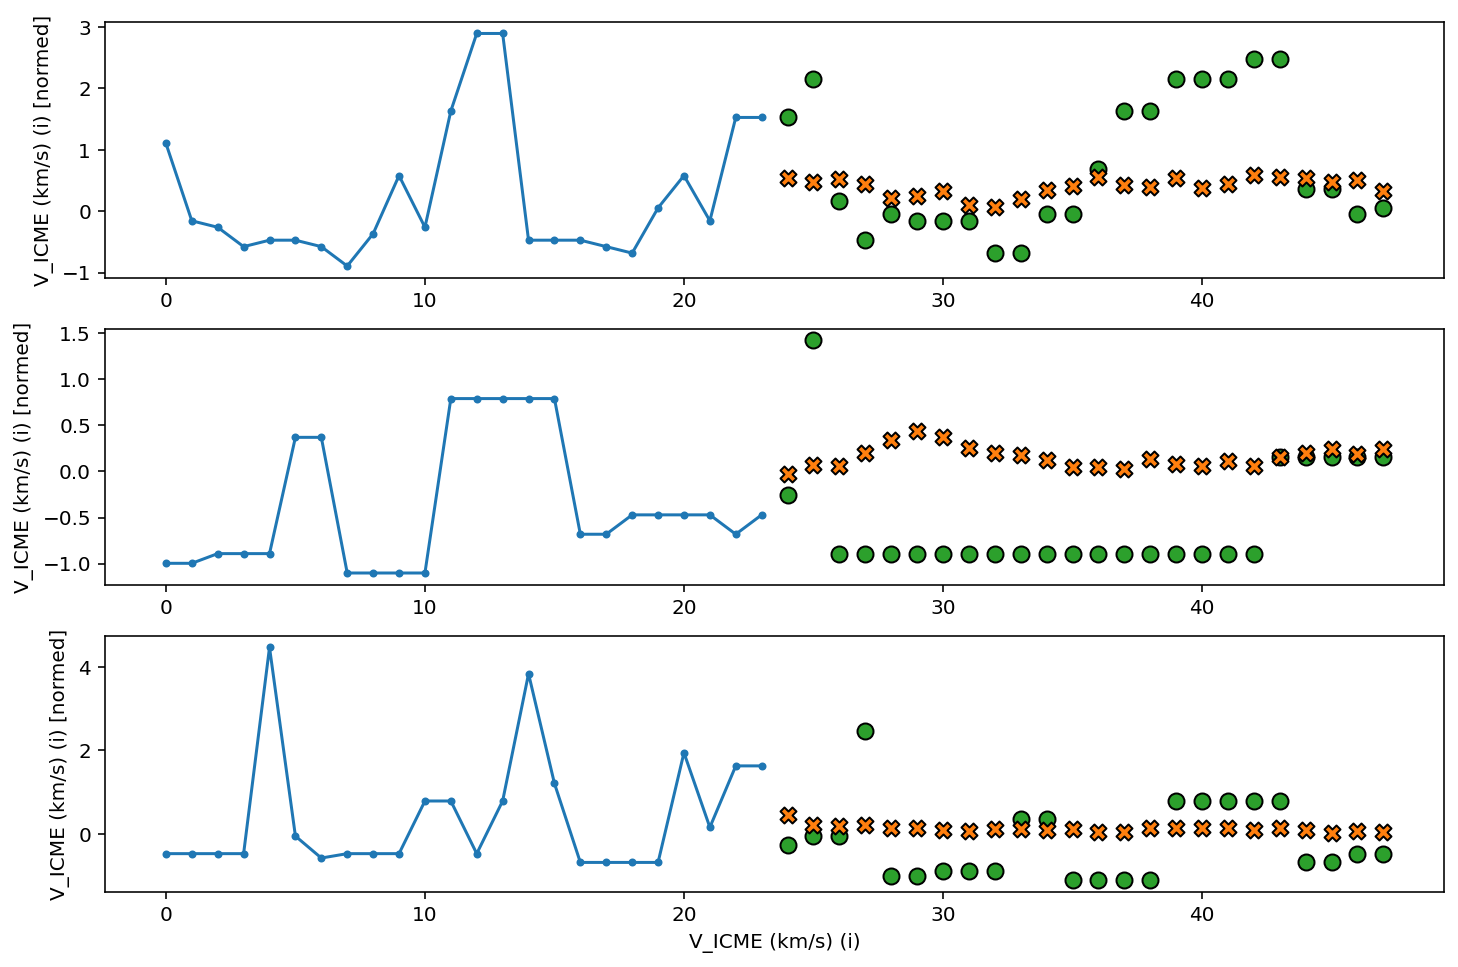

In [120]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

# IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

## CNN

<p align="left">
  <img width="400" src="../Assets/cnn2.png" >
</p>


Epoch 1/20
10/10 [==============================] - 1s 18ms/step - loss: 1.0041 - mean_absolute_error: 0.8383 - val_loss: 1.0218 - val_mean_absolute_error: 0.8627
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.9686 - mean_absolute_error: 0.8213 - val_loss: 1.0447 - val_mean_absolute_error: 0.8694
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 1.0803 - mean_absolute_error: 0.8795


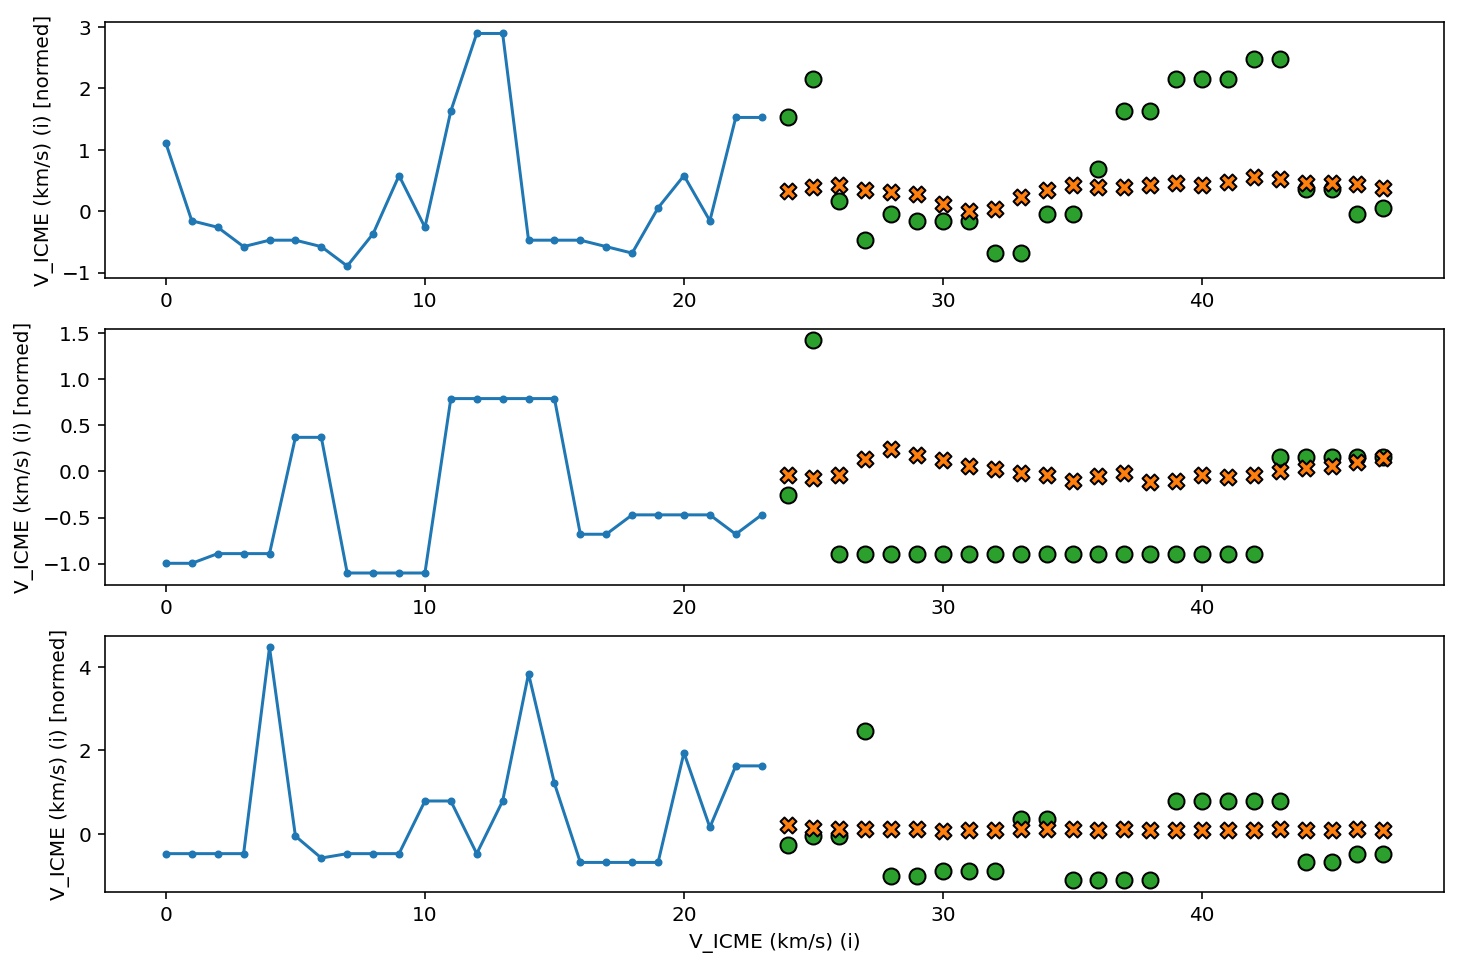

In [121]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

## RNN


<p align="left">
  <img width="400" src="../Assets/rnn2.png" >
</p>

Epoch 1/20
10/10 [==============================] - 3s 54ms/step - loss: 1.0069 - mean_absolute_error: 0.8406 - val_loss: 1.0122 - val_mean_absolute_error: 0.8615
Epoch 2/20
10/10 [==============================] - 0s 12ms/step - loss: 0.9968 - mean_absolute_error: 0.8365 - val_loss: 1.0178 - val_mean_absolute_error: 0.8637
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 1.0298 - mean_absolute_error: 0.8683


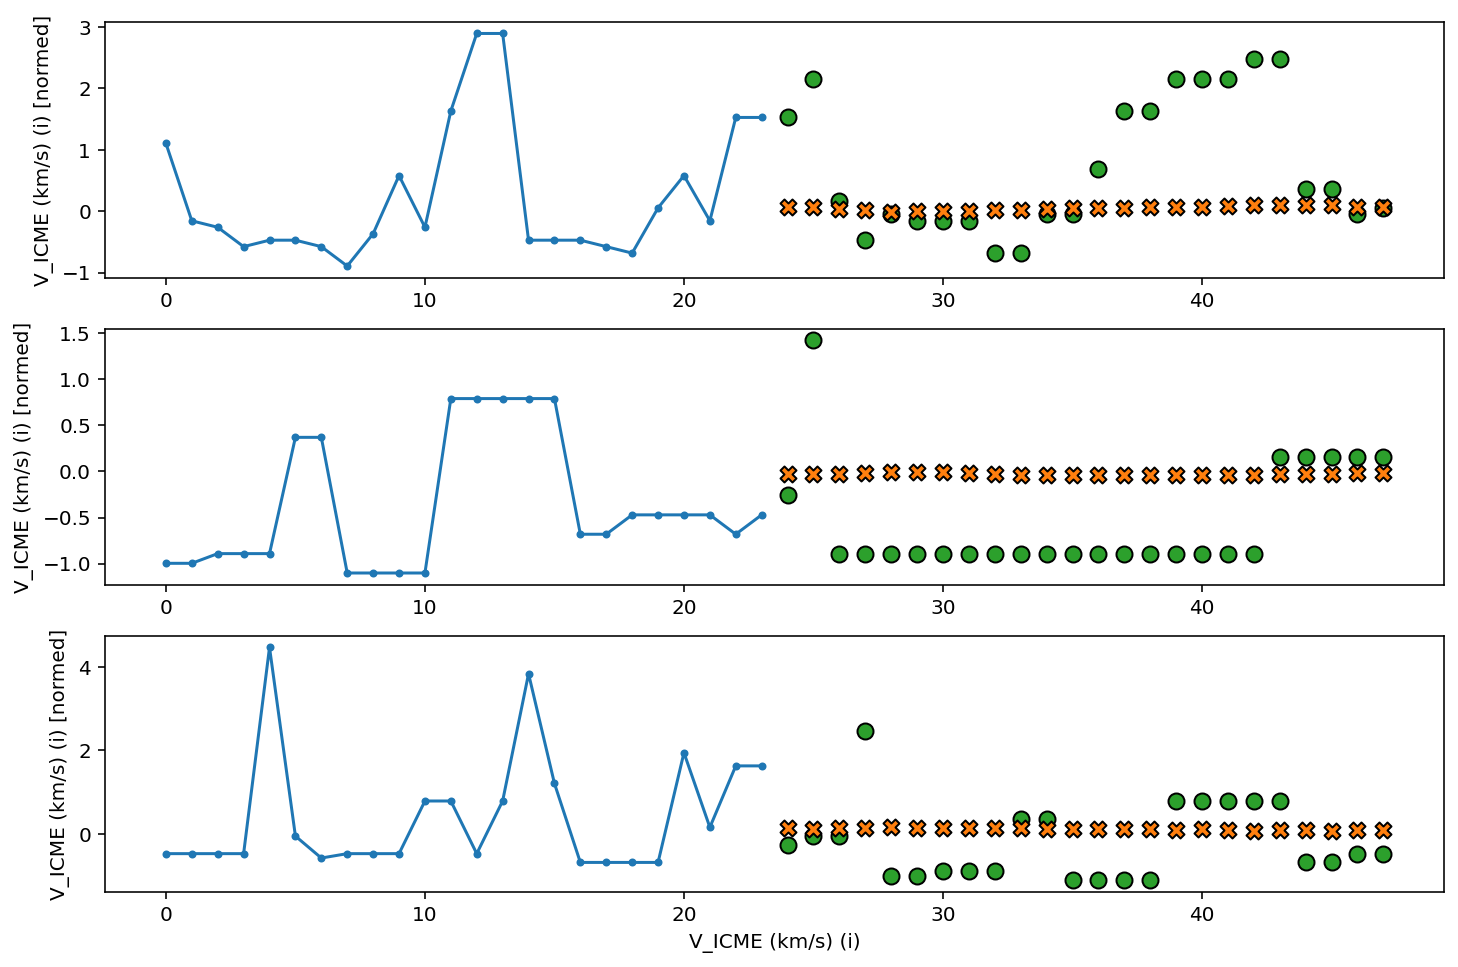

In [122]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

# Advanced: Autoregressive model




<p align="left">
  <img width="400" src="../Assets/ar.png" >
</p>

## RNN

In [123]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

In [124]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [125]:
def warmup(self, inputs):
    # inputs.shape => (batch, time, features)
    # x.shape => (batch, lstm_units)
    x, *state = self.lstm_rnn(inputs)

    # predictions.shape => (batch, features)
    prediction = self.dense(x)
    return prediction, state

FeedBack.warmup = warmup

In [126]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 8])

In [127]:
def call(self, inputs, training=None):
    
    # Use a TensorArray to capture dynamically unrolled outputs.
    predictions = []
    # Initialize the LSTM state.
    prediction, state = self.warmup(inputs)

    # Insert the first prediction.
    predictions.append(prediction)

    # Run the rest of the prediction steps.
    for n in range(1, self.out_steps):
        
        # Use the last prediction as input.
        x = prediction
        # Execute one lstm step.
        x, state = self.lstm_cell(x, states=state,
                                  training=training)
        # Convert the lstm output to a prediction.
        prediction = self.dense(x)
        # Add the prediction to the output.
        predictions.append(prediction)

    # predictions.shape => (time, batch, features)
    predictions = tf.stack(predictions)
    # predictions.shape => (batch, time, features)
    predictions = tf.transpose(predictions, [1, 0, 2])
    return predictions

FeedBack.call = call

In [128]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 8)


Epoch 1/20
10/10 [==============================] - 4s 80ms/step - loss: 1.0078 - mean_absolute_error: 0.8387 - val_loss: 1.0205 - val_mean_absolute_error: 0.8638
Epoch 2/20
10/10 [==============================] - 0s 16ms/step - loss: 0.9933 - mean_absolute_error: 0.8316 - val_loss: 1.0294 - val_mean_absolute_error: 0.8686
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 1.0527 - mean_absolute_error: 0.8768


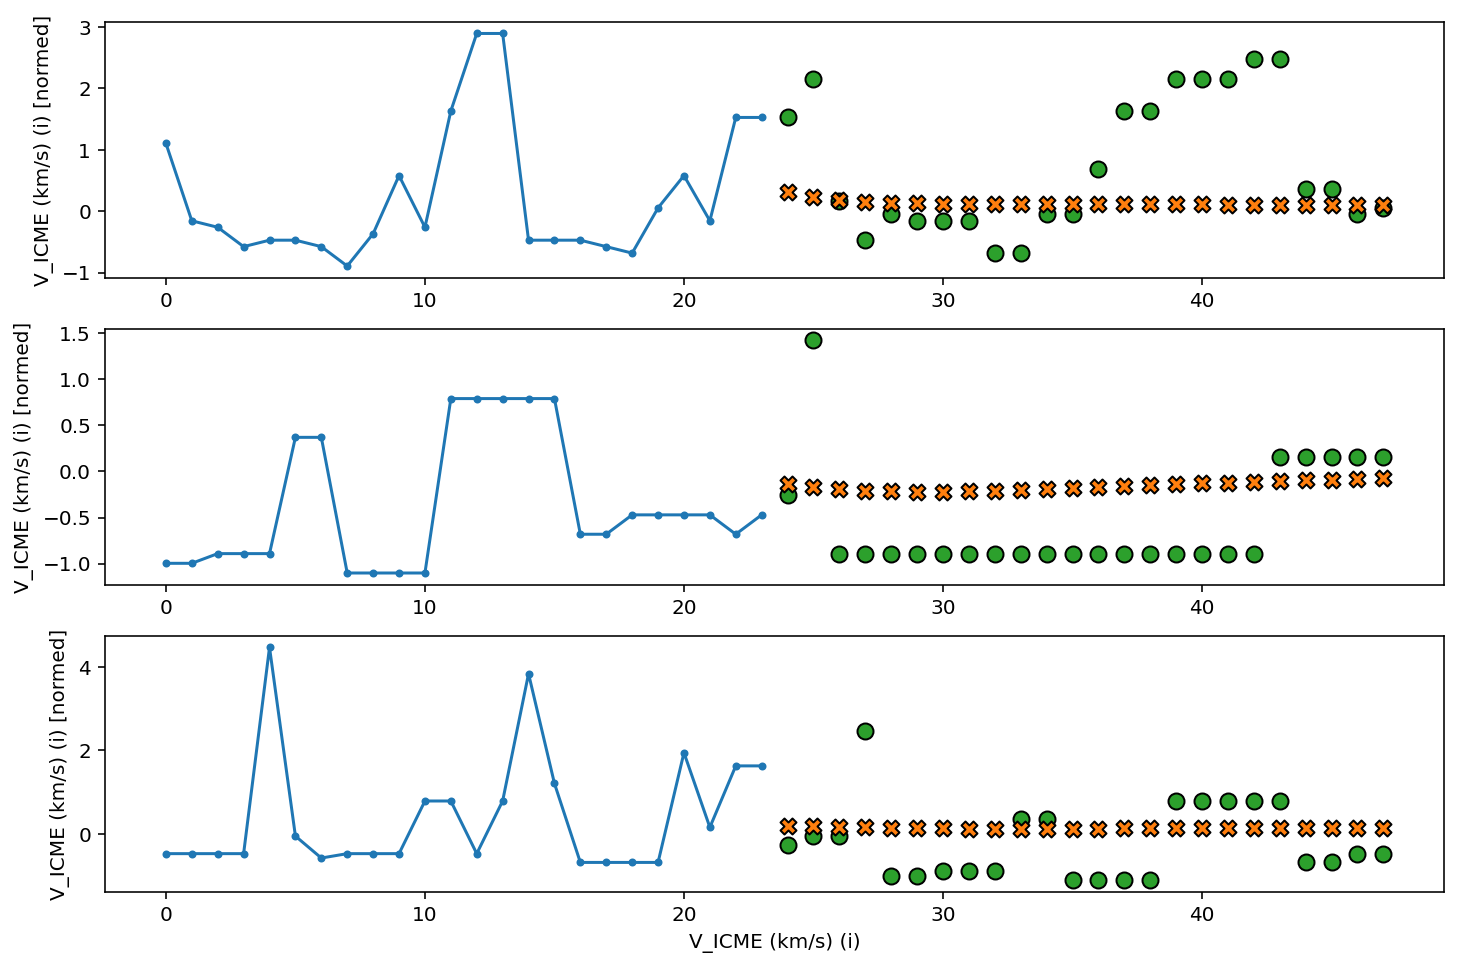

In [129]:
history = compile_and_fit(feedback_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

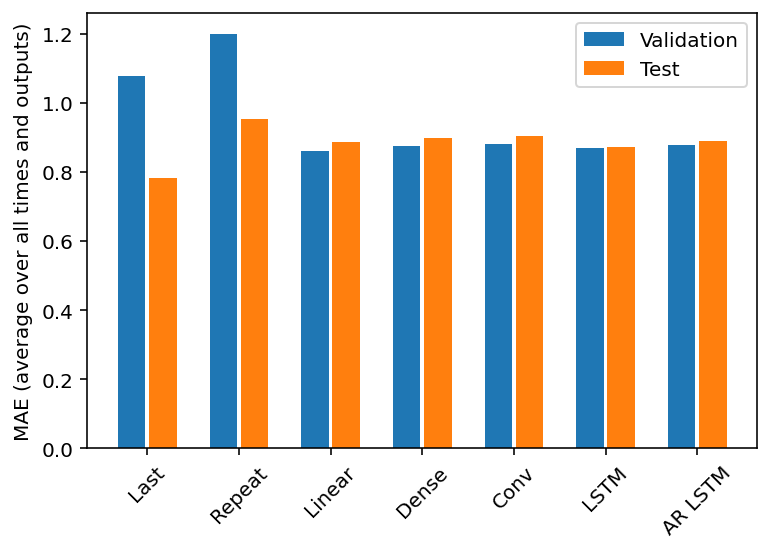

In [130]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()